#Planas

In [ ]:
'''
Planas:
Skaidrėse:
* surašyti feature'us kurių nenaudojame (string, object, images)
* surašyti iš svarbiausių feature'ų kuriuos naudojame kiek null reikšmių.
* Featurų apdoroje aprašti, kad null'us konvertuojam į 0.
* Kokių duomenų trūksta: ar tualetas yra bendras, ar virtuvė yra bendra, 
    kiek toli artimiausias parkas/miškas,
    kaip toli artimiausia stotelė, TODO: atsisiųsti stoteles iš https://www.stops.lt/kaunas/kaunas/stops.txt?1655319600000
      DAR tolimesnėje ateiyje view-source:https://www.stops.lt/kaunas/kaunas/routes.txt?1655319600000
    kaip dažnai važiuoja autobusai artimiausioje stotelėje, //
    artimiausia parduotuvė

    https://www.stops.lt/kaunas/#kaunas/map

* pridėti papildomą parametrą mažiau negu 20 m2
* palyginimą resultatų padaryti pvz. skirtumų lentelė.
* OLS pridėti
* xgboost pridėti be outlier'ių
* pridėti polinių koordinačių feature'ą

* po vieną featurą pridėti, 
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

DONE. grąžinti Plotą, o Įrengimo kategorijų reikšmes perdaryti į 1.
DONE išskaidyti pagal seniūnijas

TODO
https://en.wikipedia.org/wiki/Correlation
'''; pass

#Git

In [ ]:
'''
1. Pirmą kartą: (A. git clone URL B. git init)

2. git status #Kokia dabar situacija? T. y. Tarpinė komanda.

3. 1. pakeitimai (git add, git mv, git rm) 1-begalybės
3.2. commit (git commit -m '') Pagalba: git commit -help
3.[3. git pull] #from server/(central repository)
3.4. git push #final #TO server/(central repository)

Jeigu įvyksta klaida. Pradedam švariai nuo 0 t. y. nuo pirmo punkto.
'''; pass

#Utility functions

In [ ]:
BOLD, END = '\033[1m', '\033[0m'
def bold(s):
  return BOLD + s + END

In [ ]:
def html_table(lol):
  r = '<table>'
  for sublist in lol:
    r += '  <tr><td>'
    r += '</td><td>'.join([str(i) for i in sublist])
    r += '  </td></tr>'
  r += '</table>'
  return r

In [ ]:
def mae(y_test, y_pred):
    """mean absolute error"""
    return round(mean_absolute_error(y_test, y_pred), 3)

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

def mape(y_test, y_pred):
    """mean absolute percentage error"""
    return round(mean_absolute_percentage_error(y_test, y_pred), 4)

def wmape(y_test, y_pred):
    """weighted mean absolute percentage error"""
    wmape = sum(np.abs(y_test-y_pred)) / sum(np.abs(y_test))
    return round(wmape, 4)

def mse(y_test, y_pred):
    """mean squared error"""
    return round(mean_squared_error(y_test, y_pred), 4)

#Install

In [ ]:
#!pip install hvplot
#!pip install hvplot==0.7.3
#!pip install panel==0.12.6 hvplot==0.7.3

#Imports

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

import pickle
import os.path ##os.path.exists

#import panel as pn
#pn.extension('tabulator', sizing_mode="stretch_width")

#import hvplot.pandas

#Scrape/download data

##Scrapy

In [ ]:
#!pip install scrapy

In [ ]:
'''
import scrapy

class BlogSpider(scrapy.Spider):
    name = 'blogspider'
    start_urls = ['https://www.zyte.com/blog/']

    def parse(self, response):
        for title in response.css('.oxy-post-title'):
            yield {'title': title.css('::text').get()}

        for next_page in response.css('a.next'):
            yield response.follow(next_page, self.parse)
'''

"\nimport scrapy\n\nclass BlogSpider(scrapy.Spider):\n    name = 'blogspider'\n    start_urls = ['https://www.zyte.com/blog/']\n\n    def parse(self, response):\n        for title in response.css('.oxy-post-title'):\n            yield {'title': title.css('::text').get()}\n\n        for next_page in response.css('a.next'):\n            yield response.follow(next_page, self.parse)\n"

In [ ]:
f = open('myspider.py', 'w')
f.write('''
import scrapy

class BlogSpider(scrapy.Spider):
    name = 'blogspider'
    start_urls = ['https://www.zyte.com/blog/']

    def parse(self, response):
        for title in response.css('.oxy-post-title'):
            yield {'title': title.css('::text').get()}

        for next_page in response.css('a.next'):
            yield response.follow(next_page, self.parse)
''')

369

In [ ]:
#!scrapy runspider myspider.py

##Aruodas scrapy

In [ ]:
f = open('aruodas.py', 'w')
f.write('''
import scrapy

class AruodasSpider(scrapy.Spider):
    name = 'aruodasspider'
    start_urls = ['https://www.aruodas.lt/butai/kaune/']

    \'\'\'
    def start_requests(self):
        headers= {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:48.0) Gecko/20100101 Firefox/48.0'}

        for url in self.start_urls:
            yield Request(url, headers=headers)
    \'\'\'
    def parse(self, response):
        for url in response.css('.list-adress a::attr(href)'):
            yield {'url': url}#.css('::text').get()

        for next_page in response.css('.pagination a')[-1]:
            yield response.follow(next_page, self.parse)
''')
f.close()

In [ ]:
#!scrapy runspider  --set=USER_AGENT="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36" \
#aruodas.py

In [ ]:
!header='--header=User-Agent: Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.97 Safari/537.11';wget "$header" https://www.aruodas.lt/butai/kaune/

--2022-06-19 07:59:36--  https://www.aruodas.lt/butai/kaune/
Resolving www.aruodas.lt (www.aruodas.lt)... 104.18.34.185, 172.64.153.71
Connecting to www.aruodas.lt (www.aruodas.lt)|104.18.34.185|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-06-19 07:59:37 ERROR 403: Forbidden.



In [ ]:
headers = '''Host: www.aruodas.lt
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:100.0) Gecko/20100101 Firefox/100.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8
Accept-Language: lt,en-US;q=0.8,en;q=0.6,ru;q=0.4,pl;q=0.2
Accept-Encoding: gzip, deflate, br
Connection: keep-alive
Cookie: _ga=GA1.2.919913646.1650360720; __gfp_64b=1j.FEoqK6GoxVYg5Rn4.CKjrlzaATuwW1IYudg_Bl1L.p7|1650360738; OptanonConsent=isIABGlobal=false&datestamp=Tue+Apr+19+2022+18%3A24%3A48+GMT%2B0300+(Ryt%C5%B3+Europos+vasaros+laikas)&version=6.15.0&hosts=&consentId=4ac680ba-3442-4251-a4ea-120b01de49c2&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0003%3A1%2CC0004%3A1%2CSTACK42%3A1&geolocation=LT%3BVL&AwaitingReconsent=false; OptanonAlertBoxClosed=2022-04-19T09:32:05.155Z; eupubconsent-v2=CPXsQ-2PXsQ-2AcABBENBmCsAP_AAH_AAChQIJtf_X__b3_j-_59f_t0eY1P9_7_v-0zjhfdt-8N2f_X_L8X42M7vF36pq4KuR4Eu3LBIQdlHOHcTUmw6okVrzPsbk2Mr7NKJ7PEmnMbO2dYGH9_n93TuZKY7__8___z__-v_v____f_r-3_3__5_X---_e_V399zLv9_____9nN___9ggmASYal9AF2JY4Mm0aVQogRhWEh0AoAKKAYWiawgZXBTsrgI9QQsAEJqAjAiBBiCjFgEAAgEASERASAHggEQBEAgABACpAQgAI2AQWAFgYBAAKAaFiBFAEIEhBkcFRymBARItFBPZWAJRd7GmEIZZYAUCj-iowEShBAsDISFg5jgCQEuAAA.f_gAD_gAAAAA; OTAdditionalConsentString=1~39.43.46.55.61.70.83.89.93.108.117.122.124.131.135.136.143.144.147.149.159.162.167.171.192.196.202.211.218.228.230.239.241.259.266.272.286.291.311.317.322.323.326.327.338.367.371.385.389.394.397.407.413.415.424.430.436.440.445.449.453.482.486.491.494.495.501.503.505.522.523.540.550.559.560.568.574.576.584.587.591.733.737.745.780.787.802.803.817.820.821.829.839.864.867.874.899.904.922.931.938.979.981.985.1003.1024.1027.1031.1033.1034.1040.1046.1051.1053.1067.1085.1092.1095.1097.1099.1107.1127.1135.1143.1149.1152.1162.1166.1186.1188.1201.1205.1211.1215.1226.1227.1230.1252.1268.1270.1276.1284.1286.1290.1301.1307.1312.1345.1356.1364.1365.1375.1403.1415.1416.1419.1440.1442.1449.1455.1456.1465.1495.1512.1516.1525.1540.1548.1555.1558.1564.1570.1577.1579.1583.1584.1591.1603.1616.1638.1651.1653.1665.1667.1677.1678.1682.1697.1699.1703.1712.1716.1721.1725.1732.1745.1750.1765.1769.1782.1786.1800.1808.1810.1825.1827.1832.1837.1838.1840.1842.1843.1845.1859.1866.1870.1878.1880.1889.1899.1917.1929.1942.1944.1962.1963.1964.1967.1968.1969.1978.2003.2007.2008.2027.2035.2039.2044.2046.2047.2052.2056.2064.2068.2070.2072.2074.2088.2090.2103.2107.2109.2115.2124.2130.2133.2137.2140.2145.2147.2150.2156.2166.2177.2183.2186.2202.2205.2216.2219.2220.2222.2225.2234.2253.2264.2279.2282.2292.2299.2305.2309.2312.2316.2322.2325.2328.2331.2334.2335.2336.2337.2343.2354.2357.2358.2359.2366.2370.2376.2377.2387.2392.2394.2400.2403.2405.2407.2411.2414.2416.2418.2425.2427.2440.2447.2459.2461.2462.2465.2468.2472.2477.2481.2484.2486.2488.2492.2493.2496.2497.2498.2499.2501.2510.2511.2517.2526.2527.2532.2534.2535.2542.2544.2552.2563.2564.2567.2568.2569.2571.2572.2575.2577.2583.2584.2595.2596.2601.2604.2605.2608.2609.2610.2612.2614.2621.2628.2629.2633.2634.2636.2642.2643.2645.2646.2647.2650.2651.2652.2656.2657.2658.2660.2661.2669.2670.2677.2681.2684.2686.2687.2690.2695.2698.2707.2713.2714.2729.2739.2767.2768.2770.2772.2784.2787.2791.2792.2798.2801.2805.2812.2813.2816.2817.2818.2821.2822.2827.2830.2831.2834.2836.2838.2839.2840.2844.2846.2847.2849.2850.2851.2852.2854.2856.2860.2862.2863.2865.2867.2869.2873.2874.2875.2876.2878.2880.2881.2882.2883.2884.2886.2887.2888.2889.2891.2893.2894.2895.2897.2898.2900.2901.2908.2909.2911.2912.2913.2914.2916.2917.2918.2919.2920.2922.2923.2924.2927.2929.2930.2931.2939.2940.2941.2942.2947.2949.2950.2956.2961.2962.2963.2964.2965.2966.2968.2970.2973.2974.2975.2979.2980.2981.2983.2985.2986.2987.2991.2993.2994.2995.2997.2999.3000.3002.3003.3005.3008.3009.3010.3012.3016.3017.3018.3019.3024.3025.3028.3034.3037.3038.3043.3045.3048.3052.3053.3055.3058.3059.3063.3065.3066.3068.3070.3072.3073.3074.3075.3076.3077.3078.3089.3090.3093.3094.3095.3097.3099.3100.3104.3106.3109.3112.3116.3117.3118.3119.3120.3124.3126.3127.3128.3130.3135.3136.3145.3149.3150.3151.3154.3155.3162.3163.3167.3172.3173.3180.3182.3183.3184.3185.3187.3188.3189.3190.3194.3196.3197.3209.3210.3211.3214.3215.3217.3219.3222.3223.3225.3226.3227.3228.3230.3231.3232.3234.3235.3236.3237.3238.3240.3241.3244.3245.3250.3251.3253.3257.3260.3268.3270.3272.3281.3288.3290.3292.3293.3295.3296.3300.3302; __gads=ID=04f996d04b768cd8-225167cf7acd0094:T=1650360832:S=ALNI_MacfV7MzJyV7MzgMkAE4t147d48XQ
Upgrade-Insecure-Requests: 1
Sec-Fetch-Dest: document
Sec-Fetch-Mode: navigate
Sec-Fetch-Site: none
Sec-Fetch-User: ?1'''
for header in headers.split('\n'):
  print("--header='"+header+"'", end=' ')

--header='Host: www.aruodas.lt' --header='User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:100.0) Gecko/20100101 Firefox/100.0' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' --header='Accept-Language: lt,en-US;q=0.8,en;q=0.6,ru;q=0.4,pl;q=0.2' --header='Accept-Encoding: gzip, deflate, br' --header='Connection: keep-alive' --header='Cookie: _ga=GA1.2.919913646.1650360720; __gfp_64b=1j.FEoqK6GoxVYg5Rn4.CKjrlzaATuwW1IYudg_Bl1L.p7|1650360738; OptanonConsent=isIABGlobal=false&datestamp=Tue+Apr+19+2022+18%3A24%3A48+GMT%2B0300+(Ryt%C5%B3+Europos+vasaros+laikas)&version=6.15.0&hosts=&consentId=4ac680ba-3442-4251-a4ea-120b01de49c2&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0003%3A1%2CC0004%3A1%2CSTACK42%3A1&geolocation=LT%3BVL&AwaitingReconsent=false; OptanonAlertBoxClosed=2022-04-19T09:32:05.155Z; eupubconsent-v2=CPXsQ-2PXsQ-2AcABBENBmCsAP_AAH_AAChQIJtf_X__b3_j-_59f_t0eY1P9_7_v-0zjhfdt-8N2f_X_L8X42M7vF36p

In [ ]:
#!wget --header='User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:100.0) Gecko/20100101 Firefox/100.0' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' --header='Accept-Language: lt,en-US;q=0.8,en;q=0.6,ru;q=0.4,pl;q=0.2' --header='Accept-Encoding: gzip, deflate, br' --header='Connection: keep-alive' --header='Cookie: _ga=GA1.2.919913646.1650360720; __gfp_64b=1j.FEoqK6GoxVYg5Rn4.CKjrlzaATuwW1IYudg_Bl1L.p7|1650360738; OptanonConsent=isIABGlobal=false&datestamp=Tue+Apr+19+2022+18%3A24%3A48+GMT%2B0300+(Ryt%C5%B3+Europos+vasaros+laikas)&version=6.15.0&hosts=&consentId=4ac680ba-3442-4251-a4ea-120b01de49c2&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0003%3A1%2CC0004%3A1%2CSTACK42%3A1&geolocation=LT%3BVL&AwaitingReconsent=false; OptanonAlertBoxClosed=2022-04-19T09:32:05.155Z; eupubconsent-v2=CPXsQ-2PXsQ-2AcABBENBmCsAP_AAH_AAChQIJtf_X__b3_j-_59f_t0eY1P9_7_v-0zjhfdt-8N2f_X_L8X42M7vF36pq4KuR4Eu3LBIQdlHOHcTUmw6okVrzPsbk2Mr7NKJ7PEmnMbO2dYGH9_n93TuZKY7__8___z__-v_v____f_r-3_3__5_X---_e_V399zLv9_____9nN___9ggmASYal9AF2JY4Mm0aVQogRhWEh0AoAKKAYWiawgZXBTsrgI9QQsAEJqAjAiBBiCjFgEAAgEASERASAHggEQBEAgABACpAQgAI2AQWAFgYBAAKAaFiBFAEIEhBkcFRymBARItFBPZWAJRd7GmEIZZYAUCj-iowEShBAsDISFg5jgCQEuAAA.f_gAD_gAAAAA; OTAdditionalConsentString=1~39.43.46.55.61.70.83.89.93.108.117.122.124.131.135.136.143.144.147.149.159.162.167.171.192.196.202.211.218.228.230.239.241.259.266.272.286.291.311.317.322.323.326.327.338.367.371.385.389.394.397.407.413.415.424.430.436.440.445.449.453.482.486.491.494.495.501.503.505.522.523.540.550.559.560.568.574.576.584.587.591.733.737.745.780.787.802.803.817.820.821.829.839.864.867.874.899.904.922.931.938.979.981.985.1003.1024.1027.1031.1033.1034.1040.1046.1051.1053.1067.1085.1092.1095.1097.1099.1107.1127.1135.1143.1149.1152.1162.1166.1186.1188.1201.1205.1211.1215.1226.1227.1230.1252.1268.1270.1276.1284.1286.1290.1301.1307.1312.1345.1356.1364.1365.1375.1403.1415.1416.1419.1440.1442.1449.1455.1456.1465.1495.1512.1516.1525.1540.1548.1555.1558.1564.1570.1577.1579.1583.1584.1591.1603.1616.1638.1651.1653.1665.1667.1677.1678.1682.1697.1699.1703.1712.1716.1721.1725.1732.1745.1750.1765.1769.1782.1786.1800.1808.1810.1825.1827.1832.1837.1838.1840.1842.1843.1845.1859.1866.1870.1878.1880.1889.1899.1917.1929.1942.1944.1962.1963.1964.1967.1968.1969.1978.2003.2007.2008.2027.2035.2039.2044.2046.2047.2052.2056.2064.2068.2070.2072.2074.2088.2090.2103.2107.2109.2115.2124.2130.2133.2137.2140.2145.2147.2150.2156.2166.2177.2183.2186.2202.2205.2216.2219.2220.2222.2225.2234.2253.2264.2279.2282.2292.2299.2305.2309.2312.2316.2322.2325.2328.2331.2334.2335.2336.2337.2343.2354.2357.2358.2359.2366.2370.2376.2377.2387.2392.2394.2400.2403.2405.2407.2411.2414.2416.2418.2425.2427.2440.2447.2459.2461.2462.2465.2468.2472.2477.2481.2484.2486.2488.2492.2493.2496.2497.2498.2499.2501.2510.2511.2517.2526.2527.2532.2534.2535.2542.2544.2552.2563.2564.2567.2568.2569.2571.2572.2575.2577.2583.2584.2595.2596.2601.2604.2605.2608.2609.2610.2612.2614.2621.2628.2629.2633.2634.2636.2642.2643.2645.2646.2647.2650.2651.2652.2656.2657.2658.2660.2661.2669.2670.2677.2681.2684.2686.2687.2690.2695.2698.2707.2713.2714.2729.2739.2767.2768.2770.2772.2784.2787.2791.2792.2798.2801.2805.2812.2813.2816.2817.2818.2821.2822.2827.2830.2831.2834.2836.2838.2839.2840.2844.2846.2847.2849.2850.2851.2852.2854.2856.2860.2862.2863.2865.2867.2869.2873.2874.2875.2876.2878.2880.2881.2882.2883.2884.2886.2887.2888.2889.2891.2893.2894.2895.2897.2898.2900.2901.2908.2909.2911.2912.2913.2914.2916.2917.2918.2919.2920.2922.2923.2924.2927.2929.2930.2931.2939.2940.2941.2942.2947.2949.2950.2956.2961.2962.2963.2964.2965.2966.2968.2970.2973.2974.2975.2979.2980.2981.2983.2985.2986.2987.2991.2993.2994.2995.2997.2999.3000.3002.3003.3005.3008.3009.3010.3012.3016.3017.3018.3019.3024.3025.3028.3034.3037.3038.3043.3045.3048.3052.3053.3055.3058.3059.3063.3065.3066.3068.3070.3072.3073.3074.3075.3076.3077.3078.3089.3090.3093.3094.3095.3097.3099.3100.3104.3106.3109.3112.3116.3117.3118.3119.3120.3124.3126.3127.3128.3130.3135.3136.3145.3149.3150.3151.3154.3155.3162.3163.3167.3172.3173.3180.3182.3183.3184.3185.3187.3188.3189.3190.3194.3196.3197.3209.3210.3211.3214.3215.3217.3219.3222.3223.3225.3226.3227.3228.3230.3231.3232.3234.3235.3236.3237.3238.3240.3241.3244.3245.3250.3251.3253.3257.3260.3268.3270.3272.3281.3288.3290.3292.3293.3295.3296.3300.3302; __gads=ID=04f996d04b768cd8-225167cf7acd0094:T=1650360832:S=ALNI_MacfV7MzJyV7MzgMkAE4t147d48XQ' --header='Upgrade-Insecure-Requests: 1' --header='Sec-Fetch-Dest: document' --header='Sec-Fetch-Mode: navigate' --header='Sec-Fetch-Site: none' --header='Sec-Fetch-User: ?1' https://www.aruodas.lt/butai/kaune/
#403: Forbidden

In [ ]:
!date

Sun Jun 19 07:59:37 UTC 2022


<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>Aruodas.lt</title>

    <style>*{font-size:100%;font-family:Arial,Helvetica,sans-serif;color:#444}a,a:hover,a:visited{text-decoration:none}</style>
    <meta name="viewport" content="width=device-width, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />
    <script>
    //<![CDATA[
    (function(){
      window._cf_chl_opt={
        cvId: "2",
        cType: "managed",
        cNounce: "70822",
        cRay: "71dab9f5dfb0b11b",
        cHash: "b0fbcb09dd8095e",
        cUPMDTk: "\/butai\/kaune\/?__cf_chl_tk=2xeTGCBoPg1xiM6o3VsBZlaGuG3aKFQRH07fojlwc1Q-1655625577-0-gaNycGzNGSU",
        cFPWv: "g",
        cTTimeMs: "1000",
        cLt: "n",
        cRq: {
          ru: "aHR0cHM6Ly93d3cuYXJ1b2Rhcy5sdC9idXRhaS9rYXVuZS8=",
          ra: "TW96aWxsYS81LjAgKFdpbmRvd3MgTlQgMTAuMDsgV2luNjQ7IHg2NCkgQXBwbGVXZWJLaXQvNTM3LjM2IChLSFRNTCwgbGlrZSBHZWNrbykgQ2hyb21lLzEwMS4wLjQ5NTEuNjcgU2FmYXJpLzUzNy4zNg==",
          rm: "R0VU",
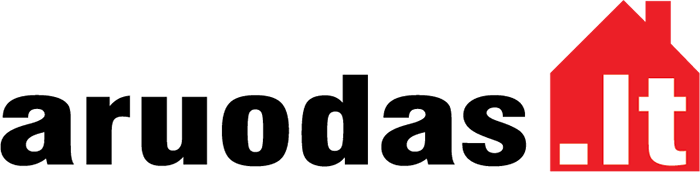

In [ ]:
! curl 'https://www.aruodas.lt/butai/kaune/' \
  -H 'authority: www.aruodas.lt' \
  -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' \
  -H 'accept-language: lt-LT,lt;q=0.9,en-US;q=0.8,en;q=0.7,ru;q=0.6,pl;q=0.5,es;q=0.4' \
  -H 'cache-control: max-age=0' \
  -H 'cookie: _ga=GA1.2.1310784533.1636377361; __gads=ID=a0ac554352e8e7be:T=1636377364:S=ALNI_MYjYEcEawLyM_PD6i3ZwjhuG0Qgow; saved_search=c1127777e967632cb66312cf498a3e11; saved_adv=c1127777e967632cb66312cf498a3e11; rca2=3ee954c874fc0cb1266e0d94a6becd04fe6d183d%3A83ffb90f766975470d5e055f8e2762a39d752f75; OptanonAlertBoxClosed=2022-03-31T08:44:09.200Z; OTAdditionalConsentString=1~39.43.46.55.61.70.83.89.93.108.117.122.124.131.135.136.143.144.147.149.159.162.167.171.192.196.202.211.218.228.230.239.241.259.266.272.286.291.311.317.322.323.326.327.338.367.371.385.389.394.397.407.413.415.424.430.436.440.445.449.453.482.486.491.494.495.501.503.505.522.523.540.550.559.560.568.574.576.584.587.591.733.737.745.780.787.802.803.817.820.821.829.839.864.867.874.899.904.922.931.938.979.981.985.1003.1024.1027.1031.1033.1034.1040.1046.1051.1053.1067.1085.1092.1095.1097.1099.1107.1127.1135.1143.1149.1152.1162.1166.1186.1188.1201.1205.1211.1215.1226.1227.1230.1252.1268.1270.1276.1284.1286.1290.1301.1307.1312.1345.1356.1364.1365.1375.1403.1415.1416.1419.1440.1442.1449.1455.1456.1465.1495.1512.1516.1525.1540.1548.1555.1558.1564.1570.1577.1579.1583.1584.1591.1603.1616.1638.1651.1653.1665.1667.1677.1678.1682.1697.1699.1703.1712.1716.1721.1725.1732.1745.1750.1765.1769.1782.1786.1800.1808.1810.1825.1827.1832.1837.1838.1840.1842.1843.1845.1859.1866.1870.1878.1880.1889.1899.1917.1929.1942.1944.1962.1963.1964.1967.1968.1969.1978.2003.2007.2008.2027.2035.2039.2044.2046.2047.2052.2056.2064.2068.2070.2072.2074.2088.2090.2103.2107.2109.2115.2124.2130.2133.2137.2140.2145.2147.2150.2156.2166.2177.2183.2186.2202.2205.2216.2219.2220.2222.2225.2234.2253.2264.2279.2282.2292.2299.2305.2309.2312.2316.2322.2325.2328.2331.2334.2335.2336.2337.2343.2354.2357.2358.2359.2366.2370.2376.2377.2387.2392.2394.2400.2403.2405.2407.2411.2414.2416.2418.2425.2427.2440.2447.2459.2461.2462.2465.2468.2472.2477.2481.2484.2486.2488.2492.2493.2496.2497.2498.2499.2501.2510.2511.2517.2526.2527.2532.2534.2535.2542.2544.2552.2563.2564.2567.2568.2569.2571.2572.2575.2577.2583.2584.2595.2596.2601.2604.2605.2608.2609.2610.2612.2614.2621.2628.2629.2633.2634.2636.2642.2643.2645.2646.2647.2650.2651.2652.2656.2657.2658.2660.2661.2669.2670.2677.2681.2684.2686.2687.2690.2695.2698.2707.2713.2714.2729.2739.2767.2768.2770.2772.2784.2787.2791.2792.2798.2801.2805.2812.2813.2816.2817.2818.2821.2822.2827.2830.2831.2834.2836.2838.2839.2840.2844.2846.2847.2849.2850.2851.2852.2854.2856.2860.2862.2863.2865.2867.2869.2873.2874.2875.2876.2878.2880.2881.2882.2883.2884.2886.2887.2888.2889.2891.2893.2894.2895.2897.2898.2900.2901.2908.2909.2911.2912.2913.2914.2916.2917.2918.2919.2920.2922.2923.2924.2927.2929.2930.2931.2939.2940.2941.2942.2947.2949.2950.2956.2961.2962.2963.2964.2965.2966.2968.2970.2973.2974.2975.2979.2980.2981.2983.2985.2986.2987.2991.2993.2994.2995.2997.2999.3000.3002.3003.3005.3008.3009.3010.3012.3016.3017.3018.3019.3024.3025.3028.3034.3037.3038.3043.3045.3048.3052.3053.3055.3058.3059.3063.3065.3066.3068.3070.3072.3073.3074.3075.3076.3077.3078.3089.3090.3093.3094.3095.3097.3099.3100.3104.3106.3109.3112.3116.3117.3118.3119.3120.3124.3126.3127.3128.3130.3135.3136.3145.3149.3150.3151.3154.3155.3162.3163.3167.3172.3173.3180.3182.3183.3184.3185.3187.3188.3189.3190.3194.3196.3197.3209.3210.3211.3214.3215.3217.3219.3222.3223.3225.3226.3227.3228.3230.3231.3232.3234.3235.3236.3237.3238.3240.3241.3244.3245.3250.3251.3253.3257.3260.3268.3270.3272.3281.3288.3290.3292.3293.3295.3296.3300; application=1; _pubcid=73eddc16-6fd9-46e9-9f56-a224861affd1; __gfp_64b=mJdwy_jxiR4fKl.3v11OqkZXqMoVNLeN2xvinm5mBAH.S7|1636377360; _gid=GA1.2.1632873101.1653291611; PHPSESSID=gclck9mgi9tncip45h8kjoa4ee; eupubconsent-v2=CPWtiJnPWtiJnAcABBENBmCsAP_AAH_AAChQIJtf_X__b3_j-_59f_t0eY1P9_7_v-0zjhfdt-8N2f_X_L8X42M7vF36pq4KuR4Eu3LBIQdlHOHcTUmw6okVrzPsbk2Mr7NKJ7PEmnMbO2dYGH9_n93TuZKY7__8__7z_v-v_v____f_r-3f3__5_X---_e_V399zLn9_____9nN___9ggmASYal5AF2JY4Mm0YRQogRhWEh0AoAKKAYWiKwgZXBTsrgI9QQsAEAqAjAiBBiCjBgEAAgEASERASAHggEQBEAgABAAoAQgAI2AQWAFgYBAAKAaFiBFAEIEhBkQERymBARIlFBPZWAJQd7GmEIZZYAUCj-ioQESgBAsDISFg5jgCQEuAAA.f_gAD_gAAAAA; _pbjs_userid_consent_data=3524755945110770; wide-window=1; cto_bidid=jKhFGV83UGxTZG0zUElTWktMMFZKY0RYZ0J0MXl5TU9LeGl2c0twVmFjZWxFWVdnR1pGZWdWN1h4YXJwdWUzT1g0WkRtMk1JZUU1MXNKamlaWEdRRFY4RmNrZWRTQ2NmSFkzTWdVUk94clBldldKZyUzRA; cto_bundle=jnDgfl9IbHVSQjJrNHlSMldZWFlVd3REU054QlJ3RnZQR09nQ3dNRW9IVUd4S0dka2djamtDUSUyQmhtQlIlMkYxZXlOMmlpZDdEaVFVJTJCNFRmdXZQb0RmQmxHSnRnTEVvYVdjVGQ4aHNSc2YxNFB3YjlScmZTMXlyOGZQSkphM3Vhc2k3bmZPODNzS3UxbWRqaG5aODJTanA3QkU5JTJGQSUzRCUzRA; OptanonConsent=isIABGlobal=false&datestamp=Mon+May+23+2022+21%3A16%3A37+GMT%2B0300+(Eastern+European+Summer+Time)&version=6.15.0&hosts=&consentId=a2733031-59e1-411b-825e-b5e478010eda&interactionCount=2&landingPath=NotLandingPage&groups=C0001%3A1%2CC0003%3A1%2CC0004%3A1%2CSTACK42%3A1&geolocation=LT%3BVL&AwaitingReconsent=false; cto_bundle=La6OZl9IbHVSQjJrNHlSMldZWFlVd3REU055QWFBQjNsJTJGUkFMbWclMkZJVnkxYnVYN3ZIVGolMkJ5UGpVWlBxZXowZTdrR1VpR09Yd1ZZZ0JBblFDYjA4QUdWczg0U2lmdnpIejVHOTVvQ05ITlZZbE9yR3JUZmlIakRONElHRngxNThEVEklMkI3U01OdExLZm1RRXZMMFBZMVREd2klMkZBJTNEJTNE; cto_bundle=La6OZl9IbHVSQjJrNHlSMldZWFlVd3REU055QWFBQjNsJTJGUkFMbWclMkZJVnkxYnVYN3ZIVGolMkJ5UGpVWlBxZXowZTdrR1VpR09Yd1ZZZ0JBblFDYjA4QUdWczg0U2lmdnpIejVHOTVvQ05ITlZZbE9yR3JUZmlIakRONElHRngxNThEVEklMkI3U01OdExLZm1RRXZMMFBZMVREd2klMkZBJTNEJTNE' \
  -H 'sec-ch-ua: " Not A;Brand";v="99", "Chromium";v="101", "Google Chrome";v="101"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "Windows"' \
  -H 'sec-fetch-dest: document' \
  -H 'sec-fetch-mode: navigate' \
  -H 'sec-fetch-site: none' \
  -H 'sec-fetch-user: ?1' \
  -H 'upgrade-insecure-requests: 1' \
  -H 'user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36' \
  --compressed

In [ ]:
'''
Taip gali atisitikti dėl to, kad per trumpą laikotarpį atidarėte didelį skaičių svetainės puslapių, arba dėl
        kitų priežasčių galėjo pasirodyti, kad svetaine bando naudotis automatinė programa (angl. bot). Tokiais atvejais
        prašome patvirtinimo, kad portalu tikrai naudojasi žmogus.
    </div>
</div>

<div class="enver" style="padding: 30px; padding-left: 10%; display: none;">
    <div style="color: #3891ca; font-weight: bold;">Why am I seeing this message?</div>

    <div style="max-width: 400px; margin-top: 10px;">
        It may happen when you are opening a large number of pages in a short period of time, or when there are other
        indications that resembles automated bot behaviour. In such cases we will ask to verify that a real person is
        using the website.
'''

'\nTaip gali atisitikti dėl to, kad per trumpą laikotarpį atidarėte didelį skaičių svetainės puslapių, arba dėl\n        kitų priežasčių galėjo pasirodyti, kad svetaine bando naudotis automatinė programa (angl. bot). Tokiais atvejais\n        prašome patvirtinimo, kad portalu tikrai naudojasi žmogus.\n    </div>\n</div>\n\n<div class="enver" style="padding: 30px; padding-left: 10%; display: none;">\n    <div style="color: #3891ca; font-weight: bold;">Why am I seeing this message?</div>\n\n    <div style="max-width: 400px; margin-top: 10px;">\n        It may happen when you are opening a large number of pages in a short period of time, or when there are other\n        indications that resembles automated bot behaviour. In such cases we will ask to verify that a real person is\n        using the website.\n'

In [ ]:
!curl --compressed --help

Usage: curl [options...] <url>
     --abstract-unix-socket <path> Connect via abstract Unix domain socket
     --anyauth       Pick any authentication method
 -a, --append        Append to target file when uploading
     --basic         Use HTTP Basic Authentication
     --cacert <file> CA certificate to verify peer against
     --capath <dir>  CA directory to verify peer against
 -E, --cert <certificate[:password]> Client certificate file and password
     --cert-status   Verify the status of the server certificate
     --cert-type <type> Certificate file type (DER/PEM/ENG)
     --ciphers <list of ciphers> SSL ciphers to use
     --compressed    Request compressed response
     --compressed-ssh Enable SSH compression
 -K, --config <file> Read config from a file
     --connect-timeout <seconds> Maximum time allowed for connection
     --connect-to <HOST1:PORT1:HOST2:PORT2> Connect to host
 -C, --continue-at <offset> Resumed transfer offset
 -b, --cookie <data> Send cookies from string/

##Curl aruodas veikiantis MAŽAS

In [ ]:
! curl 'https://www.aruodas.lt/butai/kaune/' \
  -v \
  -H 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36' \
  --compressed

*   Trying 104.18.34.185...
* TCP_NODELAY set
* Connected to www.aruodas.lt (104.18.34.185) port 443 (#0)
* ALPN, offering h2
* ALPN, offering http/1.1
* successfully set certificate verify locations:
*   CAfile: /etc/ssl/certs/ca-certificates.crt
  CApath: /etc/ssl/certs
* TLSv1.3 (OUT), TLS handshake, Client hello (1):
* TLSv1.3 (IN), TLS handshake, Server hello (2):
* TLSv1.3 (IN), TLS Unknown, Certificate Status (22):
* TLSv1.3 (IN), TLS handshake, Unknown (8):
* TLSv1.3 (IN), TLS handshake, Certificate (11):
* TLSv1.3 (IN), TLS handshake, CERT verify (15):
* TLSv1.3 (IN), TLS handshake, Finished (20):
* TLSv1.3 (OUT), TLS change cipher, Client hello (1):
* TLSv1.3 (OUT), TLS Unknown, Certificate Status (22):
* TLSv1.3 (OUT), TLS handshake, Finished (20):
* SSL connection using TLSv1.3 / TLS_AES_256_GCM_SHA384
* ALPN, server accepted to use h2
* Server certificate:
*  subject: C=US; ST=California; L=San Francisco; O=Cloudflare, Inc.; CN=aruodas.lt
*  start date: Apr 19 00:00:00 202

In [ ]:
'''
Taip gali atisitikti dėl to, kad per trumpą laikotarpį atidarėte didelį skaičių svetainės puslapių, arba dėl
        kitų priežasčių galėjo pasirodyti, kad svetaine bando naudotis automatinė programa (angl. bot). Tokiais atvejais
        prašome patvirtinimo, kad portalu tikrai naudojasi žmogus.
    </div>
</div>

<div class="enver" style="padding: 30px; padding-left: 10%; display: none;">
    <div style="color: #3891ca; font-weight: bold;">Why am I seeing this message?</div>

        It may happen when you are opening a large number of pages in a short period of time, or when there are other
        indications that resembles automated bot behaviour. In such cases we will ask to verify that a real person is
        using the website.
    </div>
'''

'\nTaip gali atisitikti dėl to, kad per trumpą laikotarpį atidarėte didelį skaičių svetainės puslapių, arba dėl\n        kitų priežasčių galėjo pasirodyti, kad svetaine bando naudotis automatinė programa (angl. bot). Tokiais atvejais\n        prašome patvirtinimo, kad portalu tikrai naudojasi žmogus.\n    </div>\n</div>\n\n<div class="enver" style="padding: 30px; padding-left: 10%; display: none;">\n    <div style="color: #3891ca; font-weight: bold;">Why am I seeing this message?</div>\n\n        It may happen when you are opening a large number of pages in a short period of time, or when there are other\n        indications that resembles automated bot behaviour. In such cases we will ask to verify that a real person is\n        using the website.\n    </div>\n'

In [ ]:
#!wget -v --user-agent='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36'  https://www.aruodas.lt/butai/kaune/
#403: Forbidden

In [ ]:
#!cat /etc/issue

In [ ]:
'''!apt-get install -y libglib2.0-0=2.50.3-2 \
    libnss3=2:3.26.2-1.1+deb9u1 \
    libgconf-2-4=3.2.6-4+b1 \
    libfontconfig1=2.11.0-6.7+b1
'''
pass

##!!!!!!!! Unzip

In [ ]:
!pip install wget #7 sek.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=31ff303d3abb0e764186da184b914924d1e2c3f4933c48aeab3e5c1ec48f8f8b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import os
if not os.path.exists('/content/aruodas-geras.7z'):
  import wget
  url = "https://github.com/linavait/2021-11-20/blob/master/namu_darbai/aruodas-geras.7z?raw=true"
  wget.download(url)

In [ ]:
#from google.colab import output
#output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

#import IPython
#display(IPython.display.Audio(url="https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg", autoplay=True))

In [ ]:
if not os.path.exists('/content/aruodas-geras'):
  !7z x /content/aruodas-geras.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 1783446 bytes (1742 KiB)

Extracting archive: /content/aruodas-geras.7z
--
Path = /content/aruodas-geras.7z
Type = 7z
Physical Size = 1783446
Headers Size = 10224
Method = LZMA2:24
Solid = +
Blocks = 1

  0%     19% 157 - aruodas-geras/1-3183218.htm                                       42% 341 - aruodas-geras/1-3198377.htm                                       69% 555 - aruodas-geras/1-3207059.htm                                      Everything

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Get ads files

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = '/content/aruodas-geras'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
from bs4 import BeautifulSoup
def get_soup(ifile):
  with open(join(mypath, ifile)) as f: html = f.read()
  return BeautifulSoup(html, 'html.parser')

In [ ]:
ifile = files[0]#'1-2519945.htm'#
with open(join(mypath, ifile)) as f: html = f.read()
html

'<!DOCTYPE html>\n<html>\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n    <meta name="format-detection" content="telephone=no">\n                        <title>Butas, Kaune Šančiuose A. Juozapavičiaus pr., 2 kambarių butas Nekilnojamo turto skelbimai - Aruodas.lt</title>\n            \n\n    \n            <link rel="shortcut icon" href="https://static.aruodas.lt/static/img/favicon.ico"/>\n        <meta name="verify-paysera" content="52ac462816d417ec3c57b60b91ee3631">\n    <meta property="fb:admins" content="1673212931"/>\n    <meta property="fb:admins" content="1076122818"/>\n    <meta property="fb:admins" content="523544227"/>\n    <meta property="fb:admins" content="1445021322"/>\n            <meta property="og:image" content="https://aruodas-img.dgn.lt/object_64_102087286/kaunas-zemieji-sanciai-a-juozapaviciaus-pr.jpg"/>\n                <meta property="og:title" content="Butas, Kaune Šančiuose A. Juozapavičiaus pr., 2 kambarių butas"/>\n       

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
print(soup.select('.price-eur'))
soup.select('.price-eur')[0].get_text().strip()

[<span class="price-eur">
                    73 000 €                </span>]


'73 000 €'

#Parcel

In [ ]:
#!pip install parsel 

In [ ]:
#from parsel import Selector
#selector = Selector(text=html)
#pd.__version__#1.3.5

#Get soup objects

In [ ]:
import resource
import sys
print(resource.getrlimit(resource.RLIMIT_STACK))
print(sys.getrecursionlimit())
#(8_388_608, -1)  -> (10_000_000, -1)
#1000 -> 100_000
max_rec = 100_000 #rekursijos dydis, pasididinam

# May segfault without this line. 0x100 is a guess at the size of each stack frame.
resource.setrlimit(resource.RLIMIT_STACK, [100 * max_rec, resource.RLIM_INFINITY])
sys.setrecursionlimit(max_rec)


(8388608, -1)
1000


In [ ]:
%%time
if os.path.exists("soup.pickle"):
  print('Started load')
  with open('soup.pickle', 'rb') as f:
    soup = pickle.load(f)
else:
  print('Started creation and save process')
  soup = {}
  for i, ifile in enumerate(files):
    soup[ifile] = get_soup(ifile)
  with open('soup.pickle', 'wb') as f:
    pickle.dump(soup, f, protocol=pickle.HIGHEST_PROTOCOL)
'''
CPU times: user 42 s, sys: 1.3 s, total: 43.3 s
Wall time: 43.3 s


Started creation and save process
CPU times: user 53.9 s, sys: 1.6 s, total: 55.5 s
Wall time: 55.6 s

Started load
CPU times: user 15.8 s, sys: 1.39 s, total: 17.2 s
Wall time: 17.1 s
'''

Started creation and save process
CPU times: user 50.3 s, sys: 1.57 s, total: 51.8 s
Wall time: 51.9 s


In [ ]:
!stat soup.pickle

  File: soup.pickle
  Size: 201526493 	Blocks: 393616     IO Block: 4096   regular file
Device: 26h/38d	Inode: 5769575     Links: 1
Access: (0644/-rw-r--r--)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2022-06-19 08:00:35.224439857 +0000
Modify: 2022-06-19 08:00:46.905437324 +0000
Change: 2022-06-19 08:00:46.905437324 +0000
 Birth: -


#DataFrame df and function

In [ ]:
import pandas as pd
columns = [#'ID', 
           'price',#in EUR
           ]
df = pd.DataFrame(columns=columns)
df.index = df.index.map(str)

def df_put_item(df, ID, dict_):
  for c in dict_:
    df.at[ID, c] = dict_[c]
    #df.at[ID, 'B']
  #if dict_['ID'] not in df['ID'].values:
    #return pd.concat([df, pd.DataFrame([dict_])], ignore_index=True)
  return df
df

,price


In [ ]:
#type(df.index[0])

#Extract features

##Price

In [ ]:
len(files)

803

In [ ]:
%%time
'''
#from IPython.core.display import Latex
CPU times: user 2.07 ms, sys: 0 ns, total: 2.07 ms
Wall time: 6.04 ms
CPU times: user 1.86 ms, sys: 0 ns, total: 1.86 ms
Wall time: 5.95 ms
CPU times: user 2.38 ms, sys: 1.03 ms, total: 3.42 ms
Wall time: 3.29 ms

soup with all files
CPU times: user 1.31 s, sys: 29.8 ms, total: 1.34 s
Wall time: 1.32 s
'''
#%%timeit
'''
The slowest run took 6.21 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 860 µs per loop
'''
from collections import OrderedDict
items = {}
for ifile in files:
    price = soup[ifile].select('.price-eur')[0].get_text().strip(' \n€').replace(' ', '') #pagal klase select
    #print(price)
    items[ifile] = OrderedDict({'ID': ifile.replace('.htm', ''), 'price': price})
    df = df_put_item(df, ifile.replace('.htm', ''), {
      'price': price
    })

#price = selector.css('.price-eur::text').get().strip(' \n€').replace(' ', '')
#price

CPU times: user 1.75 s, sys: 154 ms, total: 1.9 s
Wall time: 1.88 s


##Desc

In [ ]:
for ifile in files:
    desc = soup[ifile].select('#collapsedText')[0].get_text().strip() #pagal ID select 
    #print(len(desc))
    items[ifile]['desc'] = desc
    df = df_put_item(df, ifile.replace('.htm', ''), {
    'desc': desc
    })
'''
desc = ''.join(selector.css('#collapsedText::text').getall()).strip() #description
print(desc)
items['desc'] = desc
files[0]
'''
pass

##Address

In [ ]:
df['price'] = df['price'].astype(float)

for ifile in files:
    address = ','.join(soup[ifile].select('.obj-header-text')[0].get_text().strip().split(',')[:-1]) #pagal klase select
    seniunija = address.split(', ')[1]
    items[ifile]['seniunija'] = seniunija
    df = df_put_item(df, ifile.replace('.htm', ''), {'seniunija': seniunija})

df['category'] = df.seniunija.astype('category').cat.codes

df['mean_price_seniunija'] = df.groupby('seniunija')['price'].transform('mean')
df['median_price_seniunija'] = df.groupby('seniunija')['price'].transform('median')

df.head(10)


,price,desc,seniunija,category,mean_price_seniunija,median_price_seniunija
1-3178534,73000.0,PARDUODAMAS 2K. BUTAS - STUDIJA ARTI MIESTO CE...,Žemieji Šančiai,23,94421.023810,82476.0
1-3168320,99000.0,ROMAINIUOSE PARDUODAMI BUTAI 39- 70 KV/M DYDŽI...,Romainiai,15,110848.176471,106000.0
1-3188204,275000.0,Tai Unikali galimybė įsigyti Svajonių namus mi...,Centras,4,202665.164706,180000.0
1-3207539,154198.0,"“Life story”-namai, kuriuos sukūrėme moderniem...",Dainava,5,76100.263514,73000.0
1-3185308,94000.0,Parduodama 97.62 kv.m. mūrinio namo dalis bei ...,Vilijampolė,19,101480.867925,74300.0
1-3195292,425000.0,PARDUODAMI IŠSKIRTINIAI 3 KAMBARIŲ APARTAMENTA...,Centras,4,202665.164706,180000.0
1-3181624,85000.0,Parduodamas 3 kambarių butas 5-ių aukštų name...,Šilainiai,21,98290.731959,88000.0
1-3196868,189000.0,"Parduodamas jaukus, naujai suremontuotas 3 kam...",Centras,4,202665.164706,180000.0
1-3200527,95900.0,Parduodamas butas prestižiniame Kauno mikroraj...,Žaliakalnis,22,125283.690476,119250.0
1-3207301,75100.0,"Parduodami nedidelis jaukus butas, nuomai. Šiu...",Centras,4,202665.164706,180000.0


In [ ]:
for ifile in files:
    address = ','.join(soup[ifile].select('.obj-header-text')[0].get_text().strip().split(',')[:-1]) # .obj-header-text'pagal klase select
    seniunija = address.split(', ')[1]
    #print(len(desc))
    items[ifile]['address'] = address
    df = df_put_item(df, ifile.replace('.htm', ''), {'address': address})
    df = df_put_item(df, ifile.replace('.htm', ''), {'seniunija__'+seniunija: 1})
print(address)
'''
address = ','.join(selector.css('.obj-header-text::text').get().strip().split(',')[:-1])#' \n€').replace(' ', '')
print(address)
items['address'] = address
'''
pass

Kaunas, Žemieji Šančiai, Drobės g.


##Coords,  distance from center

In [ ]:
import geopy.distance

def get_distance_lon_lat(lat1, lon1, lat2, lon2):
  return geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).km


In [ ]:
clon = 23.913926428543153
clat = 54.896267617757346 #įrašomas miesto centras rastas pagal goole maps koord.

for ifile in files:
  item = soup[ifile].select('#thumbdirections')
  if item:
    coords = item[0].attrs['href'].split('(')[1].strip(')').replace(' ', '').split(',')
    items[ifile]['lat'] = coords[0]
    items[ifile]['lon'] = coords[1]
    df = df_put_item(df, ifile.replace('.htm', ''), {
    'lat': coords[0],
    'lon': coords[1],
    })
  if not coords[0]==None:
    df = df_put_item(df, ifile.replace('.htm', ''), {
      'dist_from_cntr': get_distance_lon_lat(clat, clon, 
                                             float(coords[0]),float(coords[1]))
    })

'''
coords = selector.css('#thumbdirections').attrib['href']  .split('(')[1].strip(')').replace(' ', '')
coords
items['coords'] = coords'''
'lat', 'lon', coords

('lat', 'lon', ['54.923339', '23.91849'])

In [ ]:
df['dist_from_cntr']

1-3178534    2.833456
1-3168320    2.833456
1-3188204    0.679311
1-3207539    3.833197
1-3185308    2.020805
               ...   
1-3189740    5.549742
1-3190794    3.708182
1-3087935    0.798733
1-3189454    3.027817
1-3173580    3.027817
Name: dist_from_cntr, Length: 803, dtype: float64

##details (at the top list)

In [ ]:
def filter_empty(items):
  return filter(lambda i: '' != i, items)

In [ ]:
'''
  for i in items2:
    df = df_put_item(df, ifile.replace('.htm', ''), {
      i: items2[i]
      })
'''

"\n  for i in items2:\n    df = df_put_item(df, ifile.replace('.htm', ''), {\n      i: items2[i]\n      })\n"

In [ ]:
def details(ifile):
  global df
  titles = soup[ifile].select('.obj-details dt')
  values = soup[ifile].select('.obj-details dd')#[:-2]

  titles = [i.prettify().strip().replace(':', '').replace('<dt>', '').replace('</dt>', '')
  .replace('<span class="plote-ad">', '').replace('</span>', '')
  .strip() for i in titles]#formatter="html"

  values = [i.prettify().strip().replace(':', '').replace(' m²', '')
  .replace('<dd>', '').replace('</dd>', '')
  .replace('<span class="special-comma">', '')
  .strip() for i in values]
  #print([method_name for method_name in dir(titles[0])
  #                if callable(getattr(titles[0], method_name))])
  
  items2 = dict(filter(lambda i: '' != i[0], zip(titles, values)))
  del items2['Reklama/pasiūlymas']
  if 'Plotas' in items2:
    items2['Plotas'] = items2['Plotas'].replace(',', '.')
  
  Plotas = items2['Plotas']
  #details__Ypatybės__Butas palėpėje

  for k, v in items2.items():
    if '</span>' in v:
      #items[k] = '; '.join(filter_empty([i.strip() for i in v.split('</span>')]))
      items2[k] = list(filter_empty([i.strip() for i in v.split('</span>')]))
      for i_value in items2[k]:
        #print(items2[i])
        #print('\t'+i_value)
        if k == 'Ypatybės' and i_value == 'Butas palėpėje':
          df = df_put_item(df, ifile.replace('.htm', ''), {
            'details__'+k+'__'+i_value: 1#items2['Plotas'] # 'details__Apsauga__Kodinė laiptinės spyna': 1
            })
        else:
          df = df_put_item(df, ifile.replace('.htm', ''), {
            'details__'+k+'__'+i_value: 1 # 'details__Apsauga__Kodinė laiptinės spyna': 1
            })
    else:
      #details__Įrengimas
      #if k == 'Plotas':
      #  continue
      if k == 'Įrengimas' and '\n' in v:
          v = v.split('\n')[0].strip()
      if k == 'Įrengimas':
         df = df_put_item(df, ifile.replace('.htm', ''), {
          'details__'+k+'__'+v: 1#Plotas#1#items2['Plotas'] # 'details__Apsauga__Kodinė laiptinės spyna': 1
          })
      else:
        df = df_put_item(df, ifile.replace('.htm', ''), {
          'details__'+k: v # 'details__Aukštas': 1,
          })          
  df = df_put_item(df, ifile.replace('.htm', ''), {
    'price_per_m2': float(df.loc[ifile.replace('.htm', ''), 'price'])/float(items2['Plotas'])
  })


  #for k, v in items.items():
  #  print(k, '=',  v)
  #items2
  #Buto numeris??? Namo numeris??? Gali nerodyti pažymėti!!!
  #display(titles)
  #values
  items[ifile].update(items2)
  return items2

df.insert(1, 'price_per_m2', None)

In [ ]:
df['price_per_m2']

1-3178534    None
1-3168320    None
1-3188204    None
1-3207539    None
1-3185308    None
             ... 
1-3189740    None
1-3190794    None
1-3087935    None
1-3189454    None
1-3173580    None
Name: price_per_m2, Length: 803, dtype: object

In [ ]:
df.head()

,price,price_per_m2,desc,seniunija,category,mean_price_seniunija,median_price_seniunija,address,seniunija__Žemieji Šančiai,seniunija__Romainiai,...,seniunija__Palemonas,seniunija__Freda,seniunija__Aukštutiniai Kaniūkai,seniunija__Lampėdžiai,seniunija__Vaišvydava,seniunija__Amaliai,seniunija__Marvelė,lat,lon,dist_from_cntr
1-3178534,73000.0,None,PARDUODAMAS 2K. BUTAS - STUDIJA ARTI MIESTO CE...,Žemieji Šančiai,23,94421.023810,82476.0,"Kaunas, Žemieji Šančiai, A. Juozapavičiaus pr.",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.87409,23.935592,2.833456
1-3168320,99000.0,None,ROMAINIUOSE PARDUODAMI BUTAI 39- 70 KV/M DYDŽI...,Romainiai,15,110848.176471,106000.0,"Kaunas, Romainiai, Medekšinės g.",NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.833456
1-3188204,275000.0,None,Tai Unikali galimybė įsigyti Svajonių namus mi...,Centras,4,202665.164706,180000.0,"Kaunas, Centras, E. Ožeškienės g.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.899098,23.904546,0.679311
1-3207539,154198.0,None,"“Life story”-namai, kuriuos sukūrėme moderniem...",Dainava,5,76100.263514,73000.0,"Kaunas, Dainava, Taikos pr.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.913774,23.965385,3.833197
1-3185308,94000.0,None,Parduodama 97.62 kv.m. mūrinio namo dalis bei ...,Vilijampolė,19,101480.867925,74300.0,"Kaunas, Vilijampolė, Linkuvos g.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.907492,23.889169,2.020805


In [ ]:
# df['mean_price_per_m2_seniunija'] = df.groupby('seniunija')['price_per_m2'].transform('mean')#.mean()#
# df['price_per_m2']

# df['median_price_per_m2_seniunija'] = df.groupby('category')['price_per_m2'].transform('median')

In [ ]:
# df['median_price_per_m2_seniunija']

In [ ]:
details(ifile='1-2973351.htm')

{'Apsauga': ['Kodinė laiptinės spyna'],
 'Aukštas': '1',
 'Aukštų sk.': '9',
 'Kambarių sk.': '2',
 'Metai': '1991',
 'Papildoma įranga': ['Su baldais',
  'Plastikiniai vamzdžiai',
  'Skalbimo mašina',
  'Šaldytuvas',
  'Virtuvės komplektas',
  'Viryklė',
  'Indaplovė',
  'Vonia'],
 'Papildomos patalpos': ['Balkonas', 'Rūsys'],
 'Pastato tipas': 'Mūrinis',
 'Plotas': '52',
 'Ypatybės': ['Internetas',
  'Tualetas ir vonia atskirai',
  'Nauja kanalizacija',
  'Nauja elektros instaliacija',
  'Virtuvė sujungta su kambariu'],
 'Įrengimas': 'Įrengtas',
 'Šildymas': 'Centrinis'}

In [ ]:
for ifile in files:
  items2 = details(ifile)
'''
if None:
  titles = selector.css('.obj-details dt').getall()#[:-2]
  values = selector.css('.obj-details dd').getall()#[:-2]

  titles = [i.strip().replace(':', '').replace('<dt>', '').replace('</dt>', '')
  .replace('<span class="plote-ad">', '').replace('</span>', '')
  .strip() for i in titles]

  values = [i.strip().replace(':', '').replace(' m²', '')
  .replace('<dd>', '').replace('</dd>', '')
  .replace('<span class="special-comma">', '')
  .strip() for i in values]

  \'\'\'
  list_of_tuples = zip(titles, values)
  fn_filter = lambda i: '' != i[0]
  avoid_empty_titles = filter(fn_filter, list_of_tuples)
  items = dict(avoid_empty_titles)
  \'\'\'
  


  items2 = dict(filter(lambda i: '' != i[0], zip(titles, values)))
  del items2['Reklama/pasiūlymas']

  for k, v in items2.items():
    if '</span>' in v:
      #items[k] = '; '.join(filter_empty([i.strip() for i in v.split('</span>')]))
      items2[k] = list(filter_empty([i.strip() for i in v.split('</span>')]))

  if 'Plotas' in items2:
    items2['Plotas'] = items2['Plotas'].replace(',', '.')

  #for k, v in items.items():
  #  print(k, '=',  v)
  items2
  #Buto numeris??? Namo numeris??? Gali nerodyti pažymėti!!!
  #display(titles)
  #values
  items.update(items2)
'''
items2

{'Aukštas': '1',
 'Aukštų sk.': '1',
 'Kambarių sk.': '3',
 'Metai': '1990',
 'Pastato tipas': 'Rąstinis',
 'Plotas': '56',
 'Įrengimas': 'Įrengtas',
 'Šildymas': 'Dujinis'}

##Phones numbers (MSISDN)

In [ ]:
for ifile in files:
  #print(ifile)
  if soup[ifile].select('.phone_item_0'):
    phone1 = soup[ifile].select('.phone_item_0')[0].get_text().replace(' ', '')
    phone2 = soup[ifile].select('.phone_item_1')[0].get_text().replace(' ', '')
  else:
    if not soup[ifile].select('.phone'):
      phone1, phone2 = None, None#Pardavėjo kontaktiniai duomenys nėra rodomi, nes skelbimas nebegalioja.
    else:
      phone1 = soup[ifile].select('.phone')[0].get_text().replace(' ', '')
      phone2 = None
      if 1 in soup[ifile].select('.phone'):
        phone2 = soup[ifile].select('.phone')[1].get_text().replace(' ', '')
  items[ifile].update({'phone1': phone1, 'phone2': phone2})
  if phone2 == '':
    phone2 = None
  #try:
  df = df_put_item(df, ifile.replace('.htm', ''), {
    'phone1': phone1,
    'phone2': phone2
    })
  #except:
  #  print(type(phone2))
#phone1 = selector.css('.phone_item_0::text').get().replace(' ', '')
#phone2 = selector.css('.phone_item_1::text').get()#.replace(' ', '')
phone1, phone2

#items.update({'phone1': phone1, 'phone2': phone2})

('+37067465199', None)

##Stats (soup)

In [ ]:
for ifile in files:
  titles = [i.get_text().strip() for i in soup[ifile].select('.obj-stats dt')]#[0].get_text().strip()
  values = [i.get_text().strip() for i in soup[ifile].select('.obj-stats dd')]
  items2 = dict(filter(
      lambda i: '' != i[0] and 'Nuoroda' != i[0]
      , zip(titles, values)
    ))
  
  items[ifile].update(items2)
  for i in items2:
    df = df_put_item(df, ifile.replace('.htm', ''), {
      i: items2[i]
      })
items2

{'Peržiūrėjo': '2194/16 (iš viso/šiandien)',
 'Redaguotas': '2022-05-23',
 'Įdėtas': '2022-01-24',
 'Įsiminė': '20'}

In [ ]:
#@title Blogas kodas
#@title
'''
titles = selector.css('.obj-stats dt::text').getall()
values = selector.css('.obj-stats dd').getall()#::text

titles = [i.strip() for i in titles]
values = [i.strip() for i in values]
print(titles)
print(values)
\'\'\'
list_of_tuples = zip(titles, values)
avoid_empty_titles = filter(lambda i: '' != i[0], list_of_tuples)
items = dict(avoid_empty_titles)
\'\'\'
#display(list(zip(titles, values)))
items = dict(filter(
    lambda i: '' != i[0] and 'Nuoroda' != i[0]
    , zip(titles, values)
  ))
items
'''
pass

##Images (soup)

In [ ]:
for ifile in files:
  links = []
  for i in soup[ifile].select('.obj-thumb'):#data-url
    if i.has_attr('data-full'):
      links.append(i.attrs['data-full'])
  items[ifile]['images'] = links
  for i, itm in enumerate(links):
    df = df_put_item(df, ifile.replace('.htm', ''), {
      'img__'+str(i): links[i]
      })
print(links)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


['https://aruodas-img.dgn.lt/object_61_97941461/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941463/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941453/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941487/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941485/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941441/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941443/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941445/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941449/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941465/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_97941481/kaunas-zemieji-sanciai-drobes-g-3.jpg', 'https://aruodas-img.dgn.lt/object_61_9794

In [ ]:
files[0], items[files[0]]

('1-3178534.htm',
 OrderedDict([('ID', '1-3178534'),
              ('price', '73000'),
              ('desc',
               'PARDUODAMAS 2K. BUTAS - STUDIJA ARTI MIESTO CENTRO!\nA. JUOZAPAVIČIAUS PR. PARDUODAMAS 1K. BUTAS – STUDIJA SU ATSKIRU ĮĖJIMU!\nBUTAS MŪRINIAME NAME, SU AUTONOMINIU ŠILDYMU(ŽIDINYS), ATSKIRU ĮĖJIMU IŠ JUOZAPAVIČIAUS PR. PUSĖS, VIETA AUTOMOBILIUI KIEME. ŠIS BUTAS PUIKIAI TINKA INVESTICIJAI, LABAI TINKAMA STUDIJAI, KŪRYBINEI ERDVEI AR JAUKIAM GYVENIMUI. LABAI ŠVIESI IR ŠILTA ERDVĖ, KURIĄ GALIMA LENGVAI PRITAIKYTI PAGAL SAVO VIZIJAS IR POREIKIUS.\nKORIDORIUJE VIETA TALPIAI SPINTAI VIRŠUTINIAMS RŪBAMS BEI SEZONINIAMS DAIKTAMS, DVIRAČIUI. BUTE VISKAS PARUOŠTA VIRTUVĖS ZONAI, JAUKI KROSNELĖ SVETAINĖS ZONOJE ŠILDYS VAKARAIS, O GRETA LAIPTŲ Į PALĖPĘ, GALIMA SUSIKURTI JAUKIĄ DARBO ERDVĘ. ĮRENGTOJE PALĖPĖJE - MIEGAMOJO ZONA. JAUKUMO IR ŠILUMOS VISAME BUTE TEIKIA MEDINĖS GRINDYS. GALIMA ĮSIVESTI DUJAS.\nSUSISIEKIMAS SU MIESTO CENTRU IR KITAIS MIESTO RAJONAIS LABAI PATOGUS, 

In [ ]:
#pd.DataFrame.from_dict(items)

#Put to DF

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 300

In [ ]:
for k, v in df.head(1).to_dict('records')[0].items():
  print(k)#, "\033[1m" + str(v) + "\033[0m")

price
price_per_m2
desc
seniunija
category
mean_price_seniunija
median_price_seniunija
address
seniunija__Žemieji Šančiai
seniunija__Romainiai
seniunija__Centras
seniunija__Dainava
seniunija__Vilijampolė
seniunija__Šilainiai
seniunija__Žaliakalnis
seniunija__Rokai
seniunija__Aleksotas
seniunija__Senamiestis
seniunija__Kalniečiai
seniunija__Sargėnai
seniunija__Panemunė
seniunija__Petrašiūnai
seniunija__Aukštieji Šančiai
seniunija__Eiguliai
seniunija__Vičiūnai
seniunija__Žemutiniai Kaniūkai
seniunija__Palemonas
seniunija__Freda
seniunija__Aukštutiniai Kaniūkai
seniunija__Lampėdžiai
seniunija__Vaišvydava
seniunija__Amaliai
seniunija__Marvelė
lat
lon
dist_from_cntr
details__Plotas
details__Kambarių sk.
details__Aukštas
details__Aukštų sk.
details__Metai
details__Pastato tipas
details__Šildymas
details__Įrengimas__Įrengtas
details__Ypatybės__Internetas
details__Ypatybės__Tualetas ir vonia atskirai
details__Ypatybės__Nauja kanalizacija
details__Ypatybės__Nauja elektros instaliacija
details__

In [ ]:
#print('1-3177580' in df['ID'].values)
'''
df_put_item(df, ifile.replace('.htm', ''), {'price':price})

if ifile.replace('.htm', '') not in df['ID'].values:
  df = df.append({
      'ID': ifile.replace('.htm', ''),
      'price':price
    }, ignore_index=True)#

df
'''

"\ndf_put_item(df, ifile.replace('.htm', ''), {'price':price})\n\nif ifile.replace('.htm', '') not in df['ID'].values:\n  df = df.append({\n      'ID': ifile.replace('.htm', ''),\n      'price':price\n    }, ignore_index=True)#\n\ndf\n"

In [ ]:
#pd.DataFrame([dictionary])
'''
df = pd.concat([df, pd.DataFrame([{
    'ID': ifile.replace('.htm', ''),
    'price': price
  }])], ignore_index=True)
'''
pass

In [ ]:
df

,price,price_per_m2,desc,seniunija,category,mean_price_seniunija,median_price_seniunija,address,seniunija__Žemieji Šančiai,seniunija__Romainiai,...,img__18,img__19,img__20,img__21,img__22,img__23,img__24,img__25,img__26,img__27
1-3178534,73000.0,1460.0,PARDUODAMAS 2K. BUTAS - STUDIJA ARTI MIESTO CE...,Žemieji Šančiai,23,94421.023810,82476.0,"Kaunas, Žemieji Šančiai, A. Juozapavičiaus pr.",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3168320,99000.0,1829.606357,ROMAINIUOSE PARDUODAMI BUTAI 39- 70 KV/M DYDŽI...,Romainiai,15,110848.176471,106000.0,"Kaunas, Romainiai, Medekšinės g.",NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3188204,275000.0,2669.902913,Tai Unikali galimybė įsigyti Svajonių namus mi...,Centras,4,202665.164706,180000.0,"Kaunas, Centras, E. Ožeškienės g.",NaN,NaN,...,https://aruodas-img.dgn.lt/object_61_102568496...,https://aruodas-img.dgn.lt/object_61_103742888...,https://aruodas-img.dgn.lt/object_61_103742890...,https://aruodas-img.dgn.lt/object_61_103742892...,https://aruodas-img.dgn.lt/object_61_96964197/...,https://aruodas-img.dgn.lt/object_61_102568498...,https://aruodas-img.dgn.lt/object_61_103742894...,NaN,NaN,NaN
1-3207539,154198.0,2150.0,"“Life story”-namai, kuriuos sukūrėme moderniem...",Dainava,5,76100.263514,73000.0,"Kaunas, Dainava, Taikos pr.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3185308,94000.0,962.917435,Parduodama 97.62 kv.m. mūrinio namo dalis bei ...,Vilijampolė,19,101480.867925,74300.0,"Kaunas, Vilijampolė, Linkuvos g.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-3189740,74999.0,1470.568627,ČERBULĖNŲ BUTAI - LIKĘ VOS KELI BUTAI \n\nPARD...,Šilainiai,21,98290.731959,88000.0,"Kaunas, Šilainiai, K. Čerbulėno g.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3190794,69000.0,1379.448221,"PARDUODAMAS 2-JŲ KAMBARIŲ BUTAS, RENOVUOTAME N...",Šilainiai,21,98290.731959,88000.0,"Kaunas, Šilainiai, Naujakurių g.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3087935,70600.0,1987.612613,Loftas parduodamas tiesiogiai iš projekto vyst...,Žaliakalnis,22,125283.690476,119250.0,"Kaunas, Žaliakalnis, Žemaičių g.",NaN,NaN,...,https://aruodas-img.dgn.lt/object_61_100944641...,https://aruodas-img.dgn.lt/object_61_100944643...,https://aruodas-img.dgn.lt/object_61_100944639...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3189454,239876.0,2150.004481,Pradedame naujai statomo kvartalo Žaliakalnyje...,Žaliakalnis,22,125283.690476,119250.0,"Kaunas, Žaliakalnis, Žeimenos g.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df.columns

'''a
b'''
#df['details__Įrengimas'].value_counts()#['1-3211952']

'a\nb'

#Pandas profiling

In [ ]:
#!pip install pandas-profiling==2.7.1

In [ ]:
#!pip install pandas_profiling

In [ ]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#pip install visions.application

In [ ]:
#import pandas_profiling
#house_price_report = pandas_profiling.ProfileReport(df)
#house_price_report.to_file('house_report.html')

#Data

In [ ]:
df.dtypes

price           float64
price_per_m2     object
desc             object
seniunija        object
category           int8
                 ...   
img__23          object
img__24          object
img__25          object
img__26          object
img__27          object
Length: 125, dtype: object

.to_dict('records')

In [ ]:
#for i in pd.DataFrame(df['price']).to_dict('records'):
#  print(int(i['price']), end=' ')

In [ ]:
df.to_csv('aruodas.csv')
df = pd.read_csv('aruodas.csv', index_col=0)

In [ ]:
#!head aruodas.csv
df.head(10)

,price,price_per_m2,desc,seniunija,category,mean_price_seniunija,median_price_seniunija,address,seniunija__Žemieji Šančiai,seniunija__Romainiai,...,img__18,img__19,img__20,img__21,img__22,img__23,img__24,img__25,img__26,img__27
1-3178534,73000.0,1460.000000,PARDUODAMAS 2K. BUTAS - STUDIJA ARTI MIESTO CE...,Žemieji Šančiai,23,94421.023810,82476.0,"Kaunas, Žemieji Šančiai, A. Juozapavičiaus pr.",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3168320,99000.0,1829.606357,ROMAINIUOSE PARDUODAMI BUTAI 39- 70 KV/M DYDŽI...,Romainiai,15,110848.176471,106000.0,"Kaunas, Romainiai, Medekšinės g.",NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3188204,275000.0,2669.902913,Tai Unikali galimybė įsigyti Svajonių namus mi...,Centras,4,202665.164706,180000.0,"Kaunas, Centras, E. Ožeškienės g.",NaN,NaN,...,https://aruodas-img.dgn.lt/object_61_102568496...,https://aruodas-img.dgn.lt/object_61_103742888...,https://aruodas-img.dgn.lt/object_61_103742890...,https://aruodas-img.dgn.lt/object_61_103742892...,https://aruodas-img.dgn.lt/object_61_96964197/...,https://aruodas-img.dgn.lt/object_61_102568498...,https://aruodas-img.dgn.lt/object_61_103742894...,NaN,NaN,NaN
1-3207539,154198.0,2150.000000,"“Life story”-namai, kuriuos sukūrėme moderniem...",Dainava,5,76100.263514,73000.0,"Kaunas, Dainava, Taikos pr.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3185308,94000.0,962.917435,Parduodama 97.62 kv.m. mūrinio namo dalis bei ...,Vilijampolė,19,101480.867925,74300.0,"Kaunas, Vilijampolė, Linkuvos g.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3195292,425000.0,5246.913580,PARDUODAMI IŠSKIRTINIAI 3 KAMBARIŲ APARTAMENTA...,Centras,4,202665.164706,180000.0,"Kaunas, Centras, Totorių g.",NaN,NaN,...,https://aruodas-img.dgn.lt/object_61_102923994...,https://aruodas-img.dgn.lt/object_61_102923996...,https://aruodas-img.dgn.lt/object_61_102923998...,https://aruodas-img.dgn.lt/object_61_102924000...,https://aruodas-img.dgn.lt/object_61_102924002...,https://aruodas-img.dgn.lt/object_61_102924522...,https://aruodas-img.dgn.lt/object_61_102923954...,NaN,NaN,NaN
1-3181624,85000.0,1376.072527,Parduodamas 3 kambarių butas 5-ių aukštų name...,Šilainiai,21,98290.731959,88000.0,"Kaunas, Šilainiai, Baltų pr.",NaN,NaN,...,https://aruodas-img.dgn.lt/object_61_102250586...,https://aruodas-img.dgn.lt/object_61_102250588...,https://aruodas-img.dgn.lt/object_61_102250568...,https://aruodas-img.dgn.lt/object_61_102250552...,https://aruodas-img.dgn.lt/object_61_102250554...,https://aruodas-img.dgn.lt/object_61_102250718...,https://aruodas-img.dgn.lt/object_61_102250596...,NaN,NaN,NaN
1-3196868,189000.0,2802.491103,"Parduodamas jaukus, naujai suremontuotas 3 kam...",Centras,4,202665.164706,180000.0,"Kaunas, Centras, Vytauto pr.",NaN,NaN,...,https://aruodas-img.dgn.lt/object_61_103007142...,https://aruodas-img.dgn.lt/object_61_103007144...,https://aruodas-img.dgn.lt/object_61_103007178...,https://aruodas-img.dgn.lt/object_61_103007180...,https://aruodas-img.dgn.lt/object_61_103007210...,https://aruodas-img.dgn.lt/object_61_103007168...,NaN,NaN,NaN,NaN
1-3200527,95900.0,1377.477736,Parduodamas butas prestižiniame Kauno mikroraj...,Žaliakalnis,22,125283.690476,119250.0,"Kaunas, Žaliakalnis, Zanavykų g.",NaN,NaN,...,https://aruodas-img.dgn.lt/object_61_103190375...,https://aruodas-img.dgn.lt/object_61_103190377...,https://aruodas-img.dgn.lt/object_61_103190379...,https://aruodas-img.dgn.lt/object_61_103190381...,https://aruodas-img.dgn.lt/object_61_103190339...,NaN,NaN,NaN,NaN,NaN
1-3207301,75100.0,2276.447408,"Parduodami nedidelis jaukus butas, nuomai. Šiu...",Centras,4,202665.164706,180000.0,"Kaunas, Centras, Kęstučio g.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['median_price_per_m2_seniunija'] = df.groupby('category')['price_per_m2'].transform('median')
df['median_price_per_m2_seniunija'] 

1-3178534    1907.441489
1-3168320    1829.606357
1-3188204    2859.322034
1-3207539    1675.645739
1-3185308    1500.000000
                ...     
1-3189740    1540.336825
1-3190794    1540.336825
1-3087935    1990.153035
1-3189454    1990.153035
1-3173580    1907.441489
Name: median_price_per_m2_seniunija, Length: 803, dtype: float64

## Row printed as 2 columns

In [ ]:
row = df.head(1).to_dict()#.items()[1])
#x = x.fillna(0)
#print(row)
for k in row:
  print(k, ': ', bold(str(list(row[k].values())[0])) if k != 'desc' else list(row[k].values())[0])

price :  73000.0
price_per_m2 :  1460.0
desc :  PARDUODAMAS 2K. BUTAS - STUDIJA ARTI MIESTO CENTRO!
A. JUOZAPAVIČIAUS PR. PARDUODAMAS 1K. BUTAS – STUDIJA SU ATSKIRU ĮĖJIMU!
BUTAS MŪRINIAME NAME, SU AUTONOMINIU ŠILDYMU(ŽIDINYS), ATSKIRU ĮĖJIMU IŠ JUOZAPAVIČIAUS PR. PUSĖS, VIETA AUTOMOBILIUI KIEME. ŠIS BUTAS PUIKIAI TINKA INVESTICIJAI, LABAI TINKAMA STUDIJAI, KŪRYBINEI ERDVEI AR JAUKIAM GYVENIMUI. LABAI ŠVIESI IR ŠILTA ERDVĖ, KURIĄ GALIMA LENGVAI PRITAIKYTI PAGAL SAVO VIZIJAS IR POREIKIUS.
KORIDORIUJE VIETA TALPIAI SPINTAI VIRŠUTINIAMS RŪBAMS BEI SEZONINIAMS DAIKTAMS, DVIRAČIUI. BUTE VISKAS PARUOŠTA VIRTUVĖS ZONAI, JAUKI KROSNELĖ SVETAINĖS ZONOJE ŠILDYS VAKARAIS, O GRETA LAIPTŲ Į PALĖPĘ, GALIMA SUSIKURTI JAUKIĄ DARBO ERDVĘ. ĮRENGTOJE PALĖPĖJE - MIEGAMOJO ZONA. JAUKUMO IR ŠILUMOS VISAME BUTE TEIKIA MEDINĖS GRINDYS. GALIMA ĮSIVESTI DUJAS.
SUSISIEKIMAS SU MIESTO CENTRU IR KITAIS MIESTO RAJONAIS LABAI PATOGUS, CENTRAS VOS UŽ 3 KILOMETRŲ, APLINK VISOS REIKIAMOS ĮSTAIGOS, NETOLIES NERIES UPĖS 

In [ ]:
type(df.dtypes)

pandas.core.series.Series

In [ ]:
df.head(1)

,price,price_per_m2,desc,seniunija,category,mean_price_seniunija,median_price_seniunija,address,seniunija__Žemieji Šančiai,seniunija__Romainiai,...,img__19,img__20,img__21,img__22,img__23,img__24,img__25,img__26,img__27,median_price_per_m2_seniunija
1-3178534,73000.0,1460.0,PARDUODAMAS 2K. BUTAS - STUDIJA ARTI MIESTO CE...,Žemieji Šančiai,23,94421.02381,82476.0,"Kaunas, Žemieji Šančiai, A. Juozapavičiaus pr.",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907.441489


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803 entries, 1-3178534 to 1-3173580
Columns: 126 entries, price to median_price_per_m2_seniunija
dtypes: float64(81), int64(4), object(41)
memory usage: 829.0+ KB


In [ ]:
#Select numerical features/columns

#for i in df.columns:
#  print(df[i].dtype)
#[i for i in df.columns if df[i].dtype not in ['string', 'object'] and i != 'price']

In [ ]:
df[df.columns.difference([i for i in df.columns if df[i].dtype in ['string', 'object'] or i == 'price'])].head(1)

,category,details__Apsauga__Budintis sargas,details__Apsauga__Kodinė laiptinės spyna,details__Apsauga__Signalizacija,details__Apsauga__Vaizdo kameros,details__Apsauga__Šarvuotos durys,details__Aukštas,details__Aukštų sk.,details__Kambarių sk.,details__Papildoma įranga__Dušo kabina,...,seniunija__Sargėnai,seniunija__Senamiestis,seniunija__Vaišvydava,seniunija__Vilijampolė,seniunija__Vičiūnai,seniunija__Šilainiai,seniunija__Žaliakalnis,seniunija__Žemieji Šančiai,seniunija__Žemutiniai Kaniūkai,Įsiminė
1-3178534,23,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,38.0


In [ ]:
#df.details__Plotas = df.details__Plotas.str.replace(',', '.')

In [ ]:
#type(df.details__Plotas[0])
#df.details__Plotas.dtype

In [ ]:
#Lossy workaround
df.details__Metai = df.details__Metai.apply(lambda x: x.split(' ')[0]).astype('int32')

In [ ]:
#df.convert_dtypes().info()#.infer_objects()

# Histograms

In [ ]:
def plot_hist(x, bins='auto', binrange=(0, 1_000_000)):
    plt.figure(figsize=(12,5))
    plt.tight_layout()
    sns.histplot(x, bins=bins, binrange=binrange)
    plt.show()


##Kaina

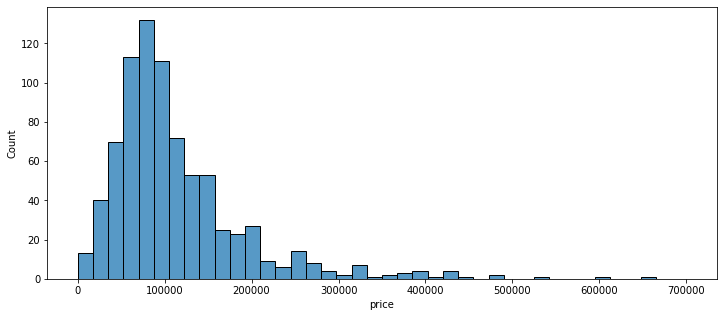

In [ ]:
plot_hist(df['price'], 40, binrange=(0, 700_000))

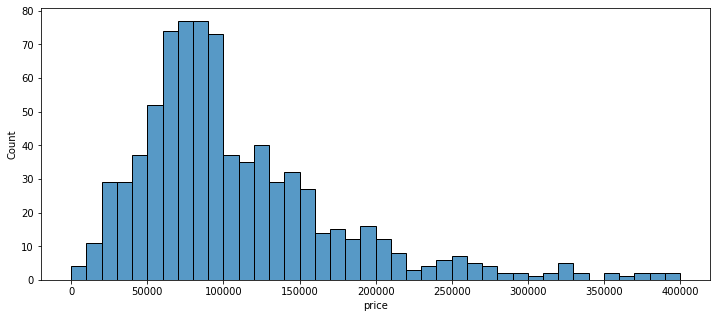

In [ ]:
plot_hist(df['price'], 40, binrange=(0, 400_000))#10_000€ rėžis vieno bar'o/stulpelio
#Vidurys tarp 70k€ ir 90k€
#10k-160k gal imti, kad labiau pusiausviras būtų

##Plotas

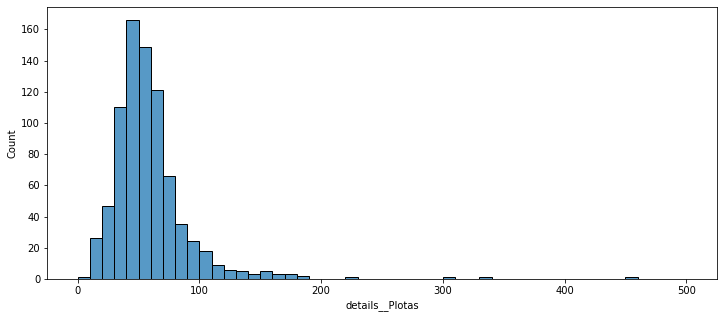

In [ ]:
plot_hist(df['details__Plotas'], 50, binrange=(0, 500))
#Išvada imti būstus 10-110 m^2, nes kiti outlier'eriai, galintys iškreipti rezultatą

##Kaina per m2

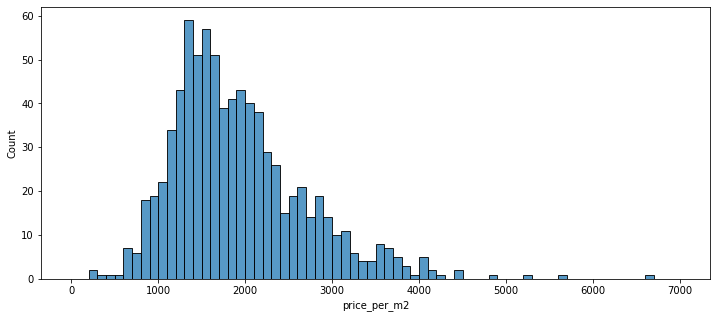

In [ ]:
plot_hist(df['price_per_m2'], 70, binrange=(0, 7000))

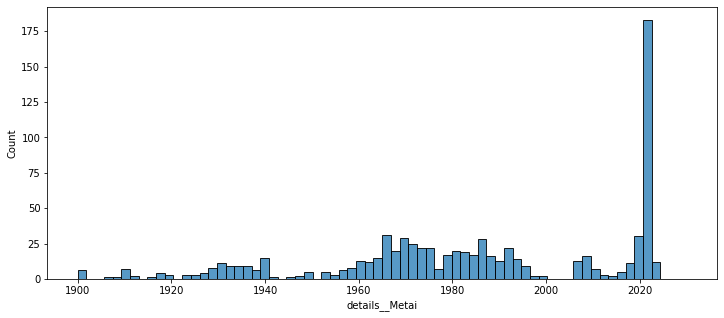

In [ ]:
plot_hist(df['details__Metai'], 70, binrange=(1900, 2030))

In [ ]:
max(df['dist_from_cntr'])

9.80478553411243

#Scatter plots

##Kaina per m2

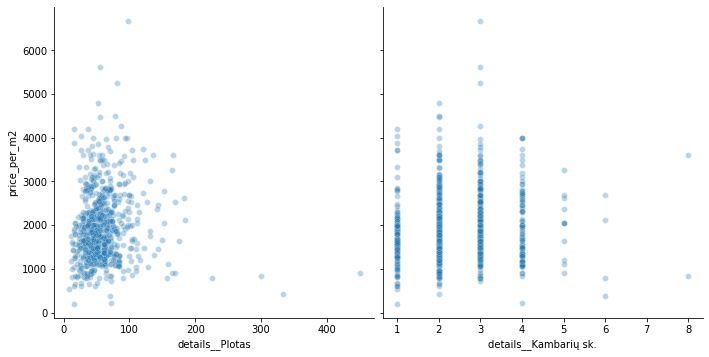

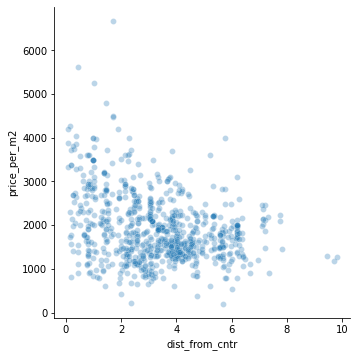

In [ ]:
sns.pairplot(data=df, x_vars=['details__Plotas', 'details__Kambarių sk.'],#, 'details__Metai' 
             y_vars=["price_per_m2"], height=5, plot_kws={'s':35, 'alpha': 0.3})

sns.pairplot(data=df, x_vars=['dist_from_cntr'], 
             y_vars=["price_per_m2"], height=5, plot_kws={'s':35, 'alpha': 0.3})

##Kaina

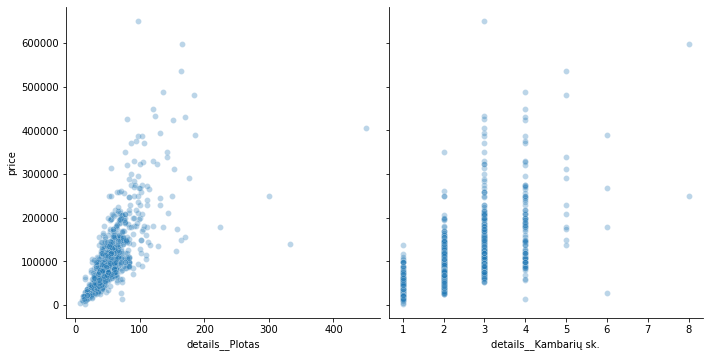

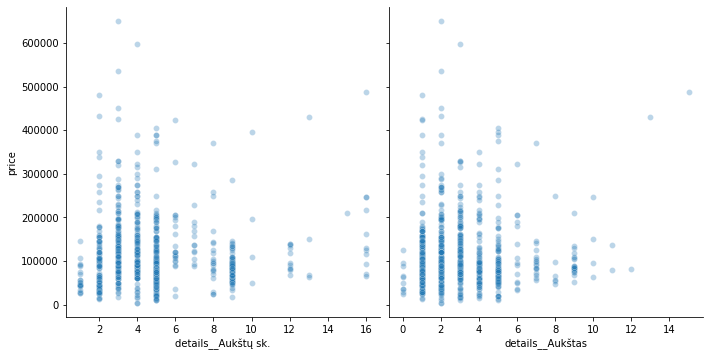

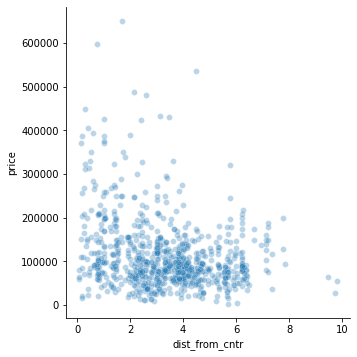

In [ ]:
import seaborn as sns
#
sns.pairplot(data=df, x_vars=['details__Plotas', 'details__Kambarių sk.'],#, 'details__Metai' 
             y_vars=["price"], height=5, plot_kws={'s':35, 'alpha': 0.3})
sns.pairplot(data=df, x_vars=['details__Aukštų sk.', 'details__Aukštas'], 
             y_vars=["price"], height=5, plot_kws={'s':35, 'alpha': 0.3})
sns.pairplot(data=df, x_vars=['dist_from_cntr'], 
             y_vars=["price"], height=5, plot_kws={'s':35, 'alpha': 0.3})


## Plotas vs. atstumas nuo centro (color=Kaina per m2)

Text(0, 0.5, 'details_Plotas')

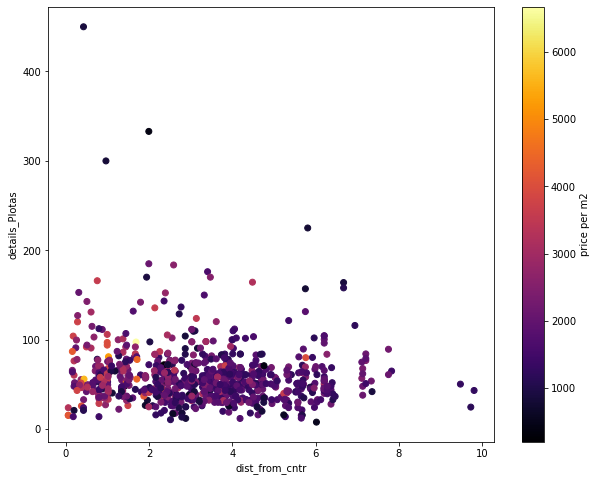

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df['dist_from_cntr'], df['details__Plotas'], c=df['price_per_m2'], cmap='inferno')#viridis, inferno
clb = plt.colorbar()
clb.set_label('price per m2')
#clb.ax.set_title('price per m2')#Virš colorbar()
plt.xlabel('dist_from_cntr')
plt.ylabel('details_Plotas')

## Įrengimas

In [ ]:
min(df['price_per_m2'])

201.40664961636827

Text(0, 0.5, 'details__Įrengimas__Įrengtas')

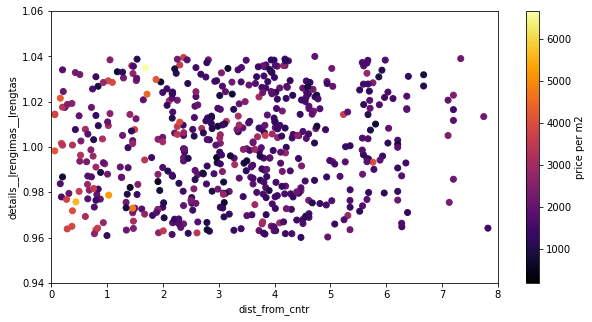

In [ ]:
import random
rnd = np.random.uniform(-0.04, 0.04, len(df))

plt.figure(figsize=(10, 5))
plt.scatter(df['dist_from_cntr'], df['details__Įrengimas__Įrengtas']+rnd, c=df['price_per_m2'], 
            cmap='inferno', vmin=min(df['price_per_m2']), vmax=max(df['price_per_m2']))#viridis, inferno
clb = plt.colorbar()
clb.set_label('price per m2')
#clb.ax.set_title('price per m2')#Virš colorbar()
plt.xlim(0, 8)
plt.ylim(0.94, 1.06)
plt.xlabel('dist_from_cntr')
plt.ylabel('details__Įrengimas__Įrengtas')

Text(0, 0.5, 'details__Įrengimas__Neįrengtas')

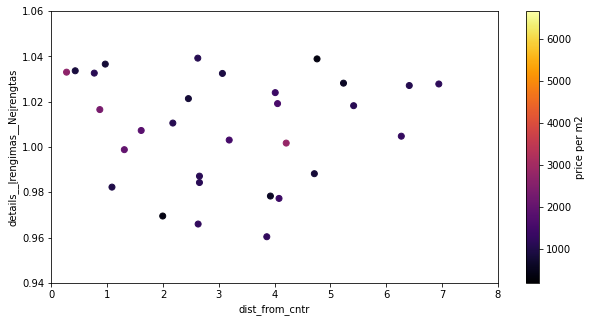

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['dist_from_cntr'], df['details__Įrengimas__Neįrengtas']+rnd, c=df['price_per_m2'], 
            cmap='inferno', vmin=min(df['price_per_m2']), vmax=max(df['price_per_m2']))#viridis, inferno
clb = plt.colorbar()
clb.set_label('price per m2')
#clb.ax.set_title('price per m2')#Virš colorbar()
plt.xlim(0, 8)
plt.ylim(0.94, 1.06)
plt.xlabel('dist_from_cntr')
plt.ylabel('details__Įrengimas__Neįrengtas')

Text(0, 0.5, 'details__Įrengimas__Dalinė apdaila')

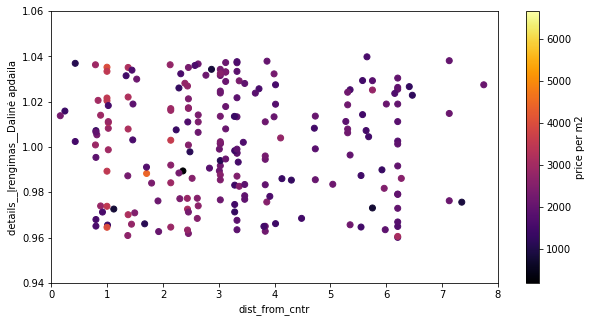

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['dist_from_cntr'], df['details__Įrengimas__Dalinė apdaila']+rnd, c=df['price_per_m2'], 
            cmap='inferno', vmin=min(df['price_per_m2']), vmax=max(df['price_per_m2']))#viridis, inferno
clb = plt.colorbar()
clb.set_label('price per m2')
#clb.ax.set_title('price per m2')#Virš colorbar()
plt.xlim(0, 8)
plt.ylim(0.94, 1.06)
plt.xlabel('dist_from_cntr')
plt.ylabel('details__Įrengimas__Dalinė apdaila')

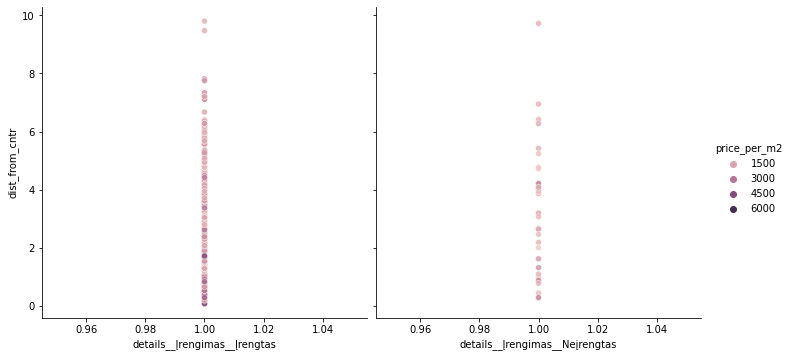

In [ ]:
sns.pairplot(data=df, x_vars=['details__Įrengimas__Įrengtas', 'details__Įrengimas__Neįrengtas'],
             y_vars=["dist_from_cntr"], height=5, plot_kws={'s':35, 'alpha': 0.8}, hue='price_per_m2')
sns.color_palette("rocket", as_cmap=True)

#Map. Scatter, fill. json administraciniu ribu koord.

In [ ]:
#Kauno seniūniūnijos (mikrorajonai)
# https://services6.arcgis.com/se9FKsVjbxuFaUIY/arcgis/rest/services/svara/FeatureServer/2/query?f=json&where=1%3D1&returnGeometry=true&spatialRel=esriSpatialRelIntersects&outFields=*&outSR=102100&resultOffset=0&resultRecordCount=1000&quantizationParameters=%7B%22mode%22%3A%22view%22%2C%22originPosition%22%3A%22upperLeft%22%2C%22tolerance%22%3A1.0583354500042346%2C%22extent%22%3A%7B%22xmin%22%3A484186.8903000001%2C%22ymin%22%3A6076066.5549%2C%22xmax%22%3A506430.22200000007%2C%22ymax%22%3A6091512.534399999%2C%22spatialReference%22%3A%7B%22wkid%22%3A2600%2C%22latestWkid%22%3A3346%7D%7D%7D


In [ ]:
#https://www.geoportal.lt/mapproxy/adm_ribos/MapServer/1/query?f=json&where=SAV_PAV = 'Kauno m. sav.'&returnGeometry=true&spatialRel=esriSpatialRelIntersects&outSR=3346
#Rasta https://www.geoportal.lt/savivaldybes/kaunas
#kauno miesto savivaldybės kontūro koordinatės

#kauno miesto administracinės ribos
#https://maps.kaunas.lt/bp/
#Upių ribos         SLUOKSNIS: Susisiekimo infrastruktūros sprendiniai -> Hidrografija
#Maždaug upių ribos SLUOKSNIS: Kiti Reglamentai -> Kiti reglamentai -> 10 proc potvynių tikimybės zona pagal AAA duomenis
#Pagrindinės gatvės SLUOKSNIS: Gatvių sprendiniai
#Gatves galime nusibraižyti iš https://github.com/Kauno-miestas/Kauno-Planas/blob/master/ADM/json/Gatv%C4%97s.json

import requests
 
url = 'https://github.com/linavait/project/raw/main/query_kauno_sav_administracines_ribos.json'
json_string = requests.get(url).content#response

url = 'https://github.com/linavait/project/raw/main/query_kauno_seniuniju_ribos.json'
json_string_kns_seniuniju_ribos = requests.get(url).content#response

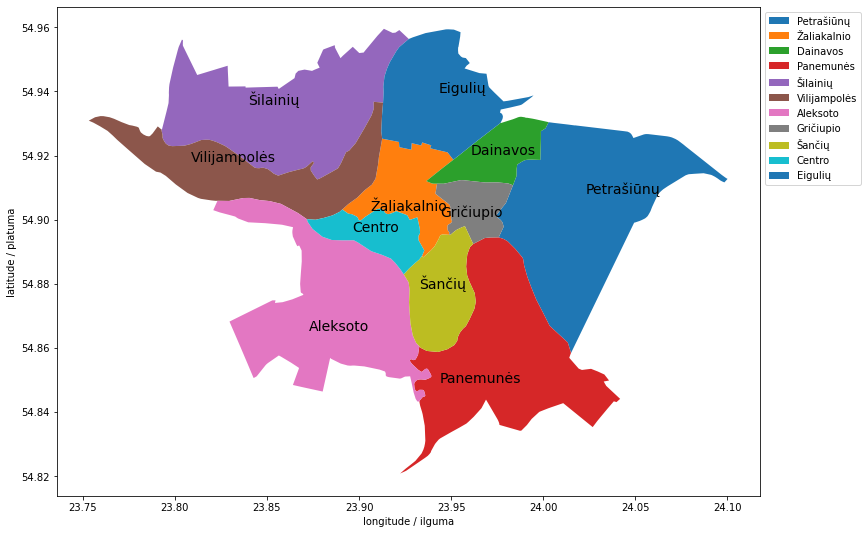

In [ ]:
import json
kauno_seniuniju_ribos = json.loads(json_string_kns_seniuniju_ribos)

i = 10
#print(kauno_seniuniju_ribos['features'][i]['attributes']['PAVAD'])#SEN
#kauno_seniuniju_ribos['features'][i]['geometry']['rings'][0]

#plt.plot(kns_konturas['longitude'], kns_konturas['latitude'])

url = 'https://github.com/Kauno-miestas/Miesto-ribos/raw/master/Kauno%20miesto%20seni%C5%ABnijos.csv'
kns_seniunijos_s = requests.get(url).text

import csv

lines = kns_seniunijos_s.splitlines()
reader = csv.reader(lines)
parsed_csv = list(reader)
#print(parsed_csv)
kns_seniunijos = []
for i in parsed_csv:
  #points = []
  
  points_unparsed = i[1].split('; ')
  tdf = pd.DataFrame(columns=['lon','lat'])
  for point in points_unparsed:
    if point:
      lon, lat, dumb = point.split(',')
      #points.append((float(lon),float(lat)))
      tdf = tdf.append({'lon':float(lon), 'lat':float(lat)}, ignore_index=True)
  kns_seniunijos.append([i[0].replace('seniūnija', ''), tdf])
'''
    csv_file_reader = csv.reader(csvfile,delimiter=',')
    for row in csv_file_reader:
        print(row)  
'''
pass
#plt.plot([lon for lon, lat in points], [lat for lon, lat in points])#kns_konturas['latitude']
plt.figure(figsize=(13, 9))
i = 10
for i in range(11):
  #plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])
  plt.fill(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])

  #TODO: Reikėtų kažko pan. kaip
  #https://stackoverflow.com/questions/1203135/what-is-the-fastest-way-to-find-the-visual-center-of-an-irregularly-shaped-pol
  plt.text(sum(kns_seniunijos[i][1]['lon']) / len(kns_seniunijos[i][1]['lon']), 
           sum(kns_seniunijos[i][1]['lat']) / len(kns_seniunijos[i][1]['lat']),
           kns_seniunijos[i][0], fontsize=14,
           horizontalalignment='center', verticalalignment='center')

f = 1.0/np.cos(54.9*np.pi/180)
#plt.plot(longitudes, latitudes, 'bo-')
plt.gca().set_aspect(f)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('longitude / ilguma')
plt.ylabel('latitude / platuma')
pass

###Map. Scatter

In [ ]:
pip install utm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=98ac189eae39793c179f23ad8d36f3867478fbb6a5ca66282fd89d9f1b12c5b7
  Stored in directory: /root/.cache/pip/wheels/a5/b0/12/7ee4fdb0f9fbb4157100bd02390436ed5d58ebfd3c6d6a0886
Successfully built utm


In [ ]:
import utm
utm.to_latlon(501060.30850000028,6088157.9506000001, 34, 'U') #ZONE_NUMBER, ZONE_LETTER
#https://www.dmap.co.uk/utmworld.htm
#https://github.com/Turbo87/utm

import json
kauno_sav_konturas = json.loads(json_string)['features'][0]['geometry']['rings'][0]

kns_konturas = pd.DataFrame(columns=['latitude','longitude'])


for x, y in kauno_sav_konturas:
  latitude, longitude = utm.to_latlon(x, y, 34.5, 'U')
  kns_konturas = kns_konturas.append({'latitude':latitude, 'longitude':longitude}, ignore_index=True)
#kns_konturas

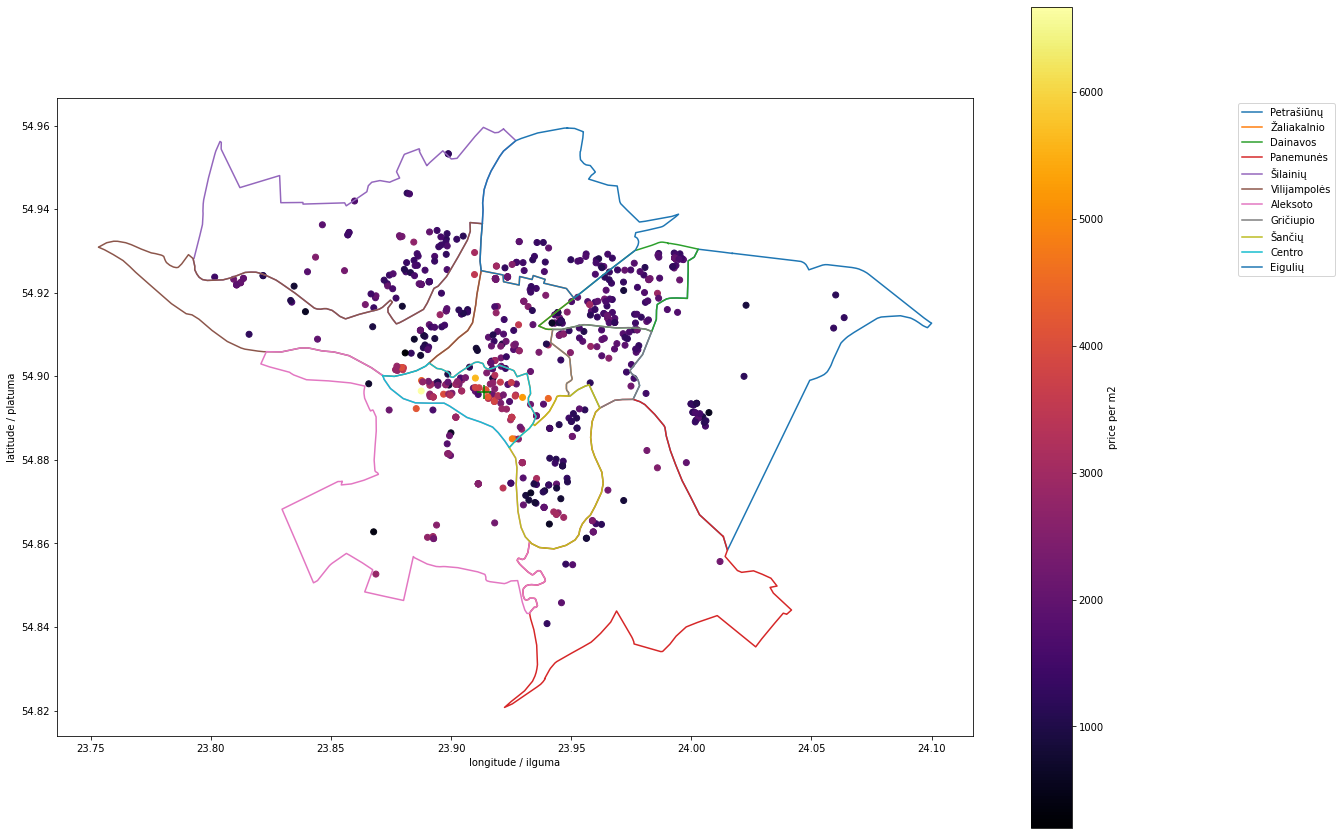

In [ ]:
scale = 1.3
plt.figure(figsize=(13*scale, scale*9))
plt.scatter(df['lon'], df['lat'], c=df['price_per_m2'], 
            cmap='inferno', vmin=min(df['price_per_m2']), vmax=max(df['price_per_m2']))#viridis, inferno
clb = plt.colorbar()
clb.set_label('price per m2')
#clb.ax.set_title('price per m2')#Virš colorbar()
plt.xlabel('longitude / ilguma')
plt.ylabel('latitude / platuma')

#TODO:
#https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

#https://stackoverflow.com/questions/66018518/aspect-ratio-for-lat-lon-plots

#plt.plot(kns_konturas['longitude'], kns_konturas['latitude'])

for i in range(11):
  plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])

f = 1.0/np.cos(54.9*np.pi/180)
#plt.plot(longitudes, latitudes, 'bo-')
plt.scatter(23.913926428543153,54.896267617757346, color='g', marker='+', linewidths=10, s=200)
plt.gca().set_aspect(f)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.4, 1)); pass
#https://www.geoportal.lt/savivaldybes/kaunas
#https://www.aruodas.lt/nt_zemelapis/butai/kaune/?obj=1&on_map=1&type=map&FOrder=Importance&FRegion=43&FDistrict=6#zoom:12;center:(54.90360837686579,23.883833121630868)
#https://maps.kaunas.lt/bp/

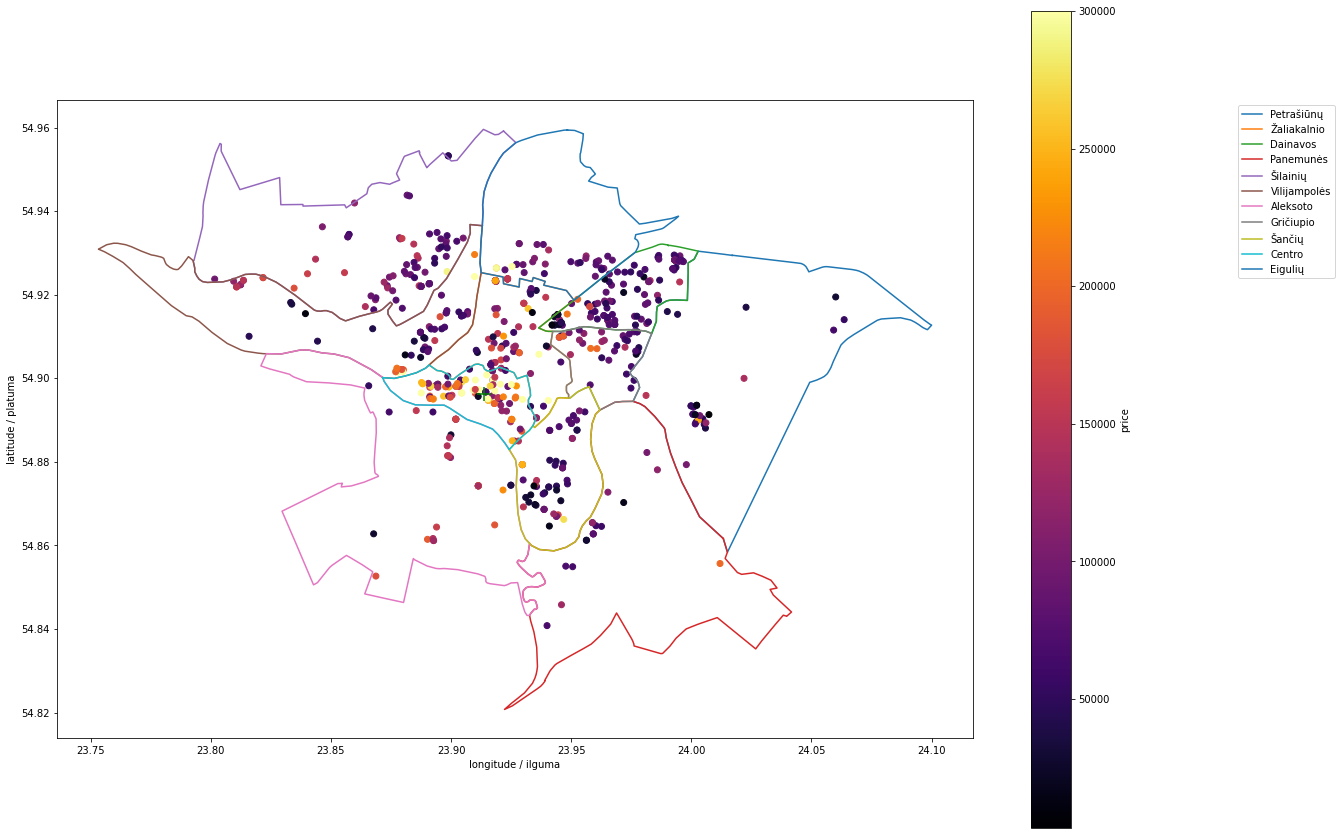

In [ ]:
scale = 1.3
plt.figure(figsize=(13*scale, scale*9))
plt.scatter(df['lon'], df['lat'], c=df['price'], 
            cmap='inferno', vmin=min(df['price']), vmax=300_000) #max(df['price']))#viridis, inferno
clb = plt.colorbar()
clb.set_label('price')
#clb.ax.set_title('price per m2')#Virš colorbar()
plt.xlabel('longitude / ilguma')
plt.ylabel('latitude / platuma')

for i in range(11):
  plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])

f = 1.0/np.cos(54.9*np.pi/180)
#plt.plot(longitudes, latitudes, 'bo-')
plt.scatter(23.913926428543153,54.896267617757346, color='g', marker='+', linewidths=10, s=200)
plt.gca().set_aspect(f)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.4, 1)); pass

##Map. Scatter (dist_from_cntr)

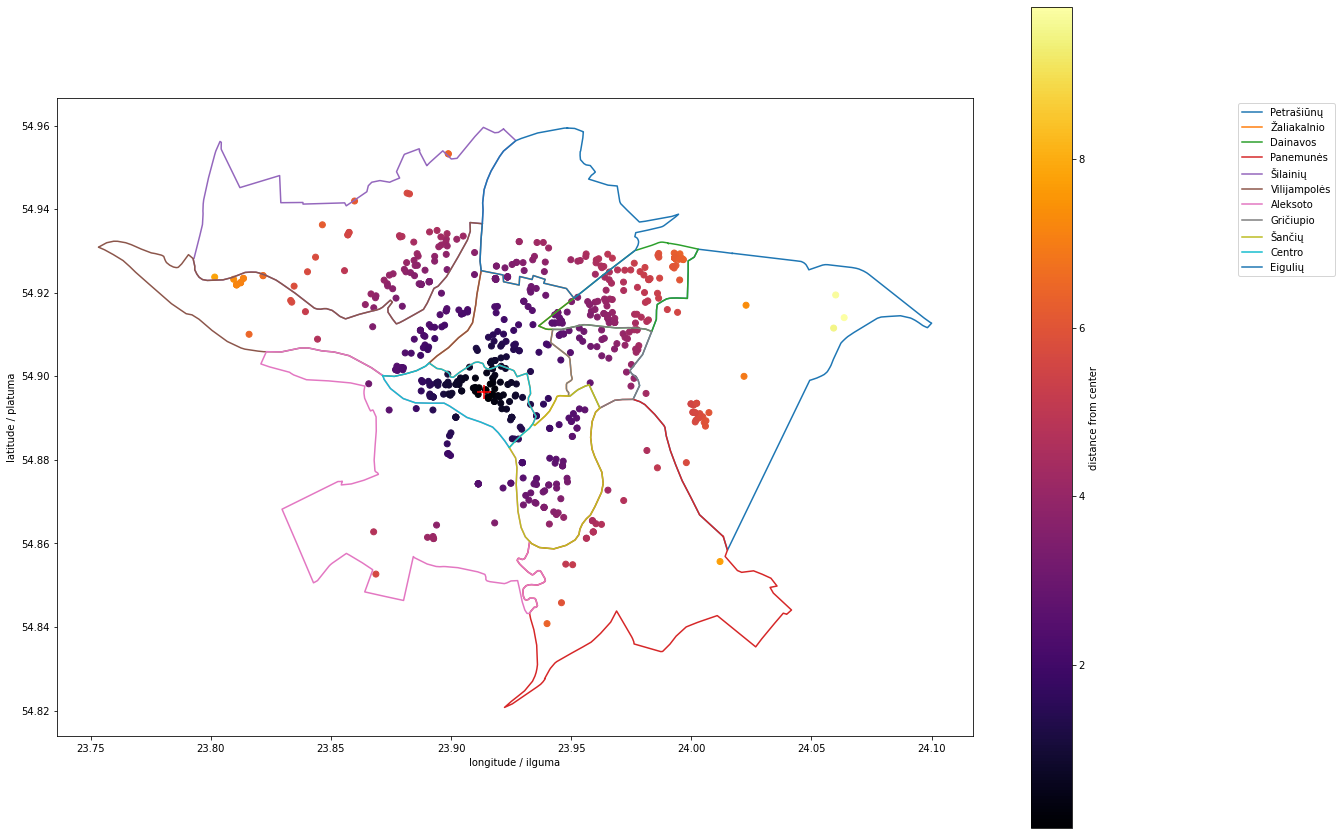

In [ ]:
scale = 1.3
plt.figure(figsize=(13*scale, scale*9))
plt.scatter(df['lon'], df['lat'], c=df['dist_from_cntr'], 
            cmap='inferno', vmin=min(df['dist_from_cntr']), vmax=max(df['dist_from_cntr']))#viridis, inferno
clb = plt.colorbar()
clb.set_label('distance from center')
#clb.ax.set_title('price per m2')#Virš colorbar()
plt.xlabel('longitude / ilguma')
plt.ylabel('latitude / platuma')

for i in range(11):
  plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])

f = 1.0/np.cos(54.9*np.pi/180)
#plt.plot(longitudes, latitudes, 'bo-')
plt.scatter(23.913926428543153,54.896267617757346, color='r', marker='+', linewidths=10, s=200)
plt.gca().set_aspect(f)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.4, 1)); pass

In [ ]:
max(df['category'])
len(np.linspace(0, 1, 24))

24

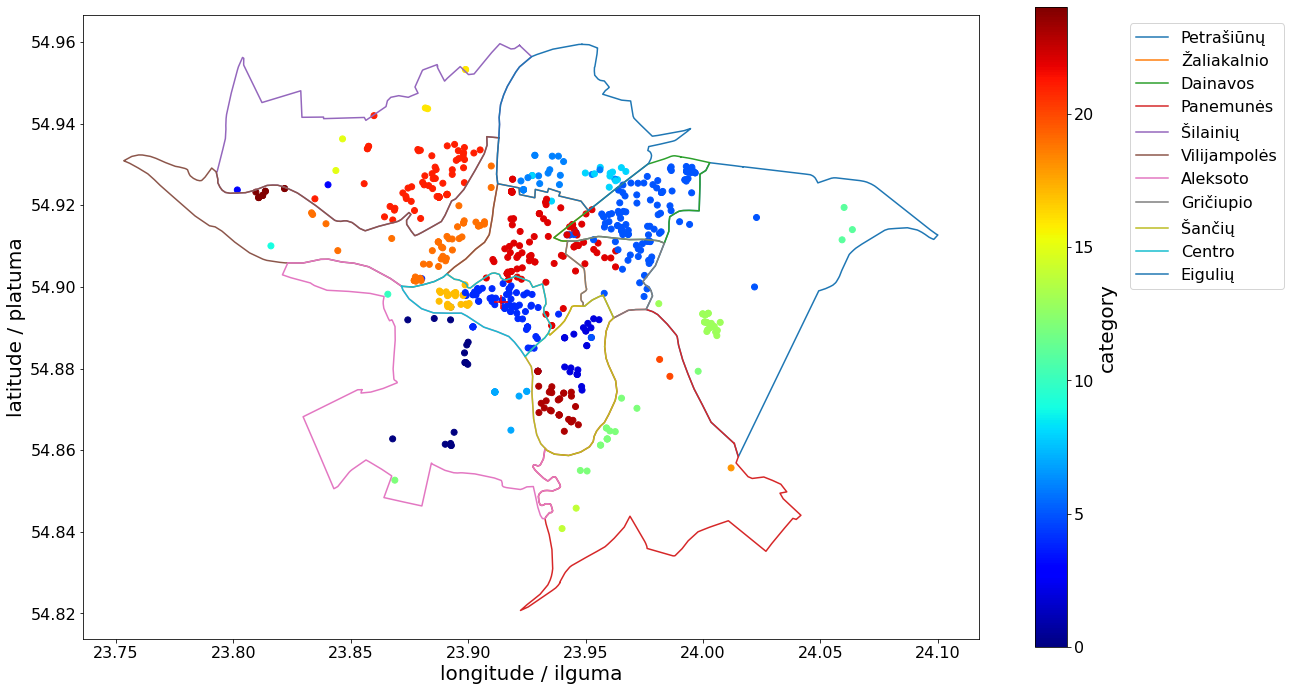

In [ ]:
import matplotlib.cm as cm
scale = 1.3
plt.figure(figsize=(13*scale, scale*9))
colors = cm.rainbow(np.linspace(0, 1, 24))
plt.scatter(df['lon'], df['lat'], c=df['category'], 
            cmap=cm.jet)#cmap='Paired', vmin=min(df['category']), vmax=max(df['category']))#viridis, inferno

# for y, c in zip(df['lat'], colors):
#     plt.scatter(df['lon'], df['lat'], color=c)

clb = plt.colorbar(shrink=0.78)
clb.set_label('category', size=20)
clb.ax.tick_params(labelsize=16) 
#clb.ax.set_title('price per m2')#Virš colorbar()

plt.xlabel('longitude / ilguma', size=20)
plt.ylabel('latitude / platuma', size=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for i in range(11):
  plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])

f = 1.0/np.cos(54.9*np.pi/180)
#plt.plot(longitudes, latitudes, 'bo-')
plt.scatter(23.913926428543153,54.896267617757346, color='r', marker='+', linewidths=10, s=200)
plt.gca().set_aspect(f)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.35, 1), fontsize=16); pass

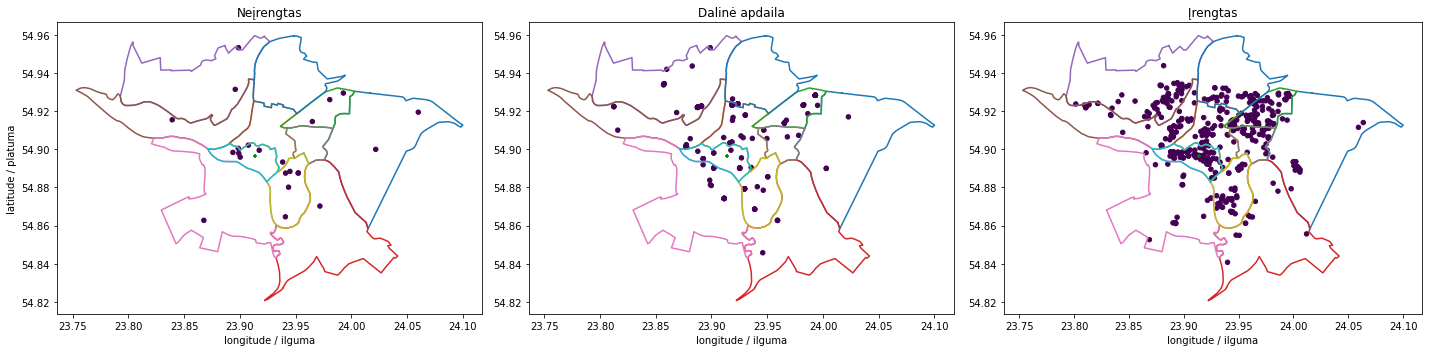

In [ ]:
scale = 1.3
plt.figure(figsize=(20, 5))  

plt.subplot(1,3,1)
plt.scatter(df['lon'], df['lat'], c=df['details__Įrengimas__Neįrengtas'], s=20)
for i in range(11):
  plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])
plt.scatter(23.913926428543153,54.896267617757346, color='g', marker='+', linewidths=10, s=20)
plt.xlabel('longitude / ilguma')
plt.ylabel('latitude / platuma')
plt.title('Neįrengtas')

plt.subplot(1,3,2)
plt.scatter(df['lon'], df['lat'], c=df['details__Įrengimas__Dalinė apdaila'], s=20)
for i in range(11):
  plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])
plt.scatter(23.913926428543153,54.896267617757346, color='g', marker='+', linewidths=10, s=20)
plt.xlabel('longitude / ilguma')
plt.title('Dalinė apdaila')

plt.subplot(1,3,3)
plt.scatter(df['lon'], df['lat'], c=df['details__Įrengimas__Įrengtas'], s=20)
for i in range(11):
  plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])
plt.scatter(23.913926428543153,54.896267617757346, color='g', marker='+', linewidths=10, s=20)
plt.xlabel('longitude / ilguma')
plt.title('Įrengtas')


# scale = 1.3
# plt.figure(figsize=(13*scale, scale*9))
# plt.scatter(df['lon'], df['lat'], c=df['details__Įrengimas__Neįrengtas'])
# plt.scatter(df['lon'], df['lat'], c=df['details__Įrengimas__Įrengtas'])
# plt.scatter(df['lon'], df['lat'], c=df['details__Įrengimas__Dalinė apdaila'])
# clb = plt.colorbar()
# clb.set_label('details__Įrengimas__Neįrengtas')
#clb.ax.set_title('price per m2')#Virš colorbar()
# plt.xlabel('longitude / ilguma')
# plt.ylabel('latitude / platuma')

# for i in range(11):
#   plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])

# plt.scatter(23.913926428543153,54.896267617757346, color='g', marker='+', linewidths=10, s=200)

f = 1.0/np.cos(54.9*np.pi/180)
# #plt.plot(longitudes, latitudes, 'bo-')

plt.gca().set_aspect(f)
plt.tight_layout()
# plt.legend(bbox_to_anchor=(1.4, 1)); pass

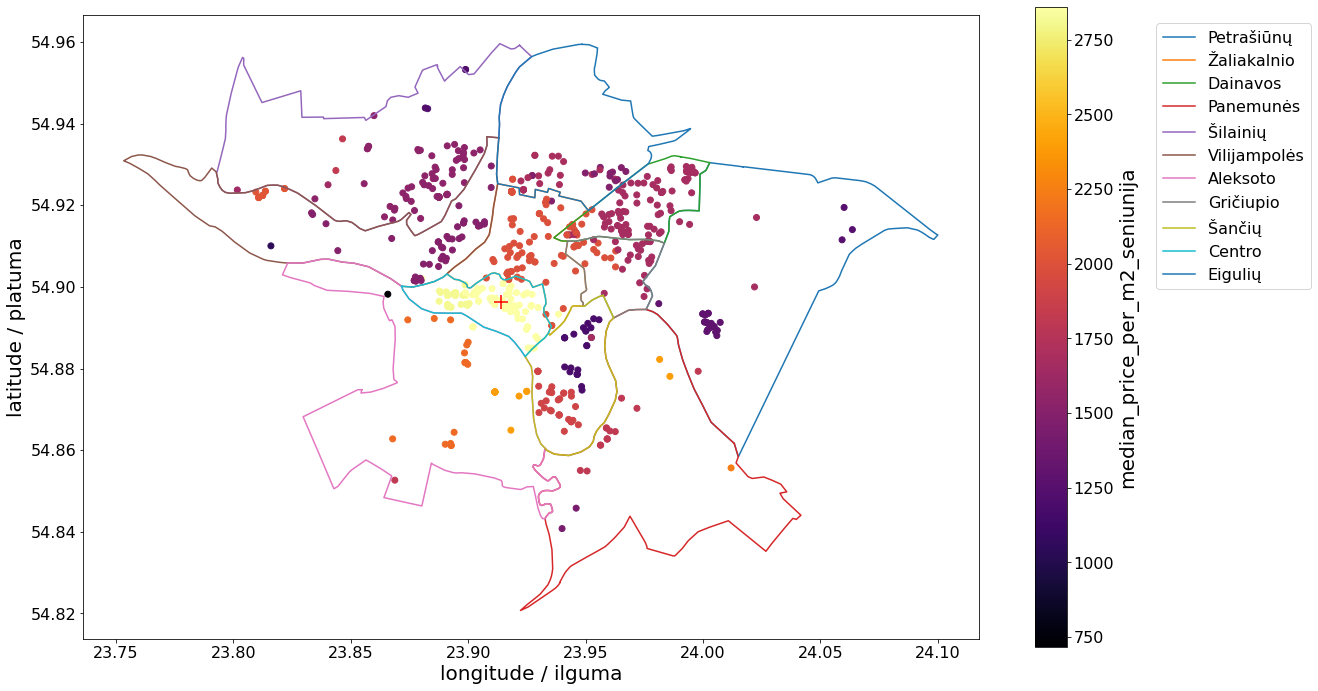

In [ ]:
scale = 1.3
plt.figure(figsize=(13*scale, scale*9))
plt.scatter(df['lon'], df['lat'], c=df['median_price_per_m2_seniunija'], 
            cmap='inferno', vmin=min(df['median_price_per_m2_seniunija']), vmax=max(df['median_price_per_m2_seniunija']))#viridis, inferno

clb = plt.colorbar(shrink=0.78)
clb.set_label('median_price_per_m2_seniunija', size=20)
clb.ax.tick_params(labelsize=16) 
#clb.ax.set_title('price per m2')#Virš colorbar()

plt.xlabel('longitude / ilguma', size=20)
plt.ylabel('latitude / platuma', size=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for i in range(11):
  plt.plot(kns_seniunijos[i][1]['lon'], kns_seniunijos[i][1]['lat'], label=kns_seniunijos[i][0])

f = 1.0/np.cos(54.9*np.pi/180)
#plt.plot(longitudes, latitudes, 'bo-')
plt.scatter(23.913926428543153,54.896267617757346, color='r', marker='+', linewidths=10, s=200)
plt.gca().set_aspect(f)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.38, 1), fontsize=16); pass

In [ ]:
print(df['lon'].isna().sum())
print(len(df)-df['lon'].isna().sum())

183
620


#Cut outliers

In [ ]:
nuo = 10
iki = 180
#idx_no_out = (nuo <= df.details__Plotas) & (df.details__Plotas < iki)
#df2 = df[idx_no_out].copy()

In [ ]:
#plot_hist(df['details__Plotas'], 100, binrange=(10, 110))

In [ ]:
import seaborn as sns

# sns.pairplot(data=df2, x_vars=['details__Plotas', 'details__Kambarių sk.', 'details__Metai'], 
#              y_vars=["price"], height=5, plot_kws={'s':35, 'alpha': 0.3})
# sns.pairplot(data=df2, x_vars=['details__Aukštų sk.', 'details__Aukštas', 'phone1'], 
#              y_vars=["price"], height=5, plot_kws={'s':35, 'alpha': 0.3})

#Train/test split

In [ ]:
#df.sort_values('details__Plotas', ascending=True, inplace=True)

x = df[df.columns.difference([i for i in df.columns 
                              if df[i].dtype in ['string', 'object'] 
                              or i == 'price' 
                              or i == 'price_per_m2'])]
#x = df[['details__Plotas', 'phone1']]
#df.loc[:, df.columns != 'price']#df[df.columns.difference(['price'])]
#x.phone1 = x.phone1.apply(lambda x: 0)

#x.drop(['phone1', 'phone2'], axis=1, inplace=True)
x = x.fillna(0)

y = df['price']


select_features = ['details__Plotas','details__Metai', 'median_price_seniunija',#'median_price_per_m2_seniunija', #'median_price_seniunija',#'seniunija__Centras', 'seniunija__Senamiestis', 
                   'details__Kambarių sk.','details__Aukštas', 'dist_from_cntr', #'details__Aukštų sk.', 
                   
       'details__Apsauga__Signalizacija',
       'details__Apsauga__Vaizdo kameros',
      #  'details__Papildoma įranga__Indaplovė',
      #  'details__Papildoma įranga__Rekuperacinė sistema',
      #  'details__Papildoma įranga__Šildomos grindys',
      #  'details__Papildoma įranga__Židinys',
       'details__Papildomos patalpos__Terasa',
       'details__Papildomos patalpos__Vieta automobiliui',
       'details__Ypatybės__Aukštos lubos',
       'details__Ypatybės__Butas per kelis aukštus',
       'details__Ypatybės__Uždaras kiemas',
       'details__Ypatybės__Virtuvė sujungta su kambariu',
      #  'details__Įrengimas__Dalinė apdaila',
      #  'seniunija__Aleksotas',
      #  'seniunija__Amaliai', 'seniunija__Aukštieji Šančiai',
      #  'seniunija__Aukštutiniai Kaniūkai',
      #  'seniunija__Dainava', 'seniunija__Eiguliai', 'seniunija__Freda',
      #  'seniunija__Kalniečiai', 'seniunija__Lampėdžiai',
      #  'seniunija__Marvelė', 'seniunija__Palemonas',
      #  'seniunija__Panemunė', 'seniunija__Petrašiūnai',
      #  'seniunija__Rokai', 'seniunija__Romainiai', 'seniunija__Sargėnai',
      #  'seniunija__Vaišvydava',
      #  'seniunija__Vilijampolė', 'seniunija__Vičiūnai',
      #  'seniunija__Šilainiai', 'seniunija__Žaliakalnis',
      #  'seniunija__Žemieji Šančiai', 'seniunija__Žemutiniai Kaniūkai'
       ]
x = x[select_features]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = {},{},{},{}

all = 'all'
no_outliers = 'noOutlrs'
i = all
X_train[i],X_test[i],y_train[i],y_test[i]=train_test_split(x, y, train_size = 0.7, random_state=42)


X_train[no_outliers] = X_train[i][(nuo <= X_train[i].details__Plotas) & 
                   (X_train[i].details__Plotas < iki)].copy()
X_test[no_outliers] = X_test[i][(nuo <= X_test[i].details__Plotas) & 
                   (X_test[i].details__Plotas < iki)].copy()

y_train[no_outliers] = y_train[i][(nuo <= X_train[i].details__Plotas) & 
                   (X_train[i].details__Plotas < iki)].copy()
y_test[no_outliers] = y_test[i][(nuo <= X_test[i].details__Plotas) & 
                   (X_test[i].details__Plotas < iki)].copy()

# details__Įrengimas__Įrengtas,
# details__Įrengimas__Dalinė apdaila,
# details__Įrengimas__Neįrengtas
# details__Įrengimas__Kita
'''
X_train2 = X_train[(nuo <= X_train.details__Įrengimas__Įrengtas) & 
                   (X_train.details__Įrengimas__Įrengtas < iki) |

                   (nuo <= X_train['details__Įrengimas__Dalinė apdaila']) & 
                   (X_train['details__Įrengimas__Dalinė apdaila'] < iki) |

                   (nuo <= X_train.details__Įrengimas__Neįrengtas) & 
                   (X_train.details__Įrengimas__Neįrengtas < iki) |

                   (nuo <= X_train.details__Įrengimas__Kita) & 
                   (X_train.details__Įrengimas__Kita < iki)
                   ].copy()

X_test2 = X_test[(nuo <= X_test.details__Įrengimas__Įrengtas) & 
                   (X_test.details__Įrengimas__Įrengtas < iki)
                   |
                   (nuo <= X_test['details__Įrengimas__Dalinė apdaila']) & 
                   (X_test['details__Įrengimas__Dalinė apdaila'] < iki)
                   |
                   (nuo <= X_test.details__Įrengimas__Neįrengtas) & 
                   (X_test.details__Įrengimas__Neįrengtas < iki)
                   |
                   (nuo <= X_test.details__Įrengimas__Kita) & 
                   (X_test.details__Įrengimas__Kita < iki)
                   ].copy()

y_train2 = y_train[(nuo <= X_train.details__Įrengimas__Įrengtas) & 
                   (X_train.details__Įrengimas__Įrengtas < iki) |

                   (nuo <= X_train['details__Įrengimas__Dalinė apdaila']) & 
                   (X_train['details__Įrengimas__Dalinė apdaila'] < iki) |

                   (nuo <= X_train.details__Įrengimas__Neįrengtas) & 
                   (X_train.details__Įrengimas__Neįrengtas < iki) |

                   (nuo <= X_train.details__Įrengimas__Kita) & 
                   (X_train.details__Įrengimas__Kita < iki)
                   ].copy()

y_test2 = y_test[(nuo <= X_test.details__Įrengimas__Įrengtas) & 
                   (X_test.details__Įrengimas__Įrengtas < iki)
                   |
                   (nuo <= X_test['details__Įrengimas__Dalinė apdaila']) & 
                   (X_test['details__Įrengimas__Dalinė apdaila'] < iki)
                   |
                   (nuo <= X_test.details__Įrengimas__Neįrengtas) & 
                   (X_test.details__Įrengimas__Neįrengtas < iki)
                   |
                   (nuo <= X_test.details__Įrengimas__Kita) & 
                   (X_test.details__Įrengimas__Kita < iki)
                   ].copy()
'''
#TODO pašalinti outlier'ius
print(len(X_train[all]),len(y_test[all]))
print(len(X_train[no_outliers]),len(y_test[no_outliers]))
print('X_train/y_test = ', round(len(X_train[all])/len(y_test[all]),2))
print('X_train[no_outliers]/y_test[no_outliers] = ', round(len(X_train[no_outliers])/len(y_test[no_outliers]),2))

'''
def train_test_split_by_feature_column(
    features, output,
    test_size=0.25, #If ``train_size`` is also None, it will
        #be set to 0.25.
    train_size=None,
    #random_state=None,
    #shuffle=True,
    #stratify=None,
):
  empty_features = features.clone()
  #https://stackoverflow.com/questions/24612584/how-to-delete-all-rows-in-a-dataframe
  empty_features.drop(empty_features.index, inplace=True)
  empty_output = output.clone()
  empty_output.drop(empty_output.index, inplace=True)
  X_train,X_test = empty_features, empty_features
  y_train,y_test = empty_output, empty_output
  #TODO: finish

#Tikslas, kad po duomenų pašalinimo išliktų vienodas santykis train/test split'o
'''
pass

562 241
557 239
X_train/y_test =  2.33
X_train[no_outliers]/y_test[no_outliers] =  2.33


In [ ]:
mae_tr = {}
mae_te = {}

mape_tr = {}
mape_te = {}

wmape_tr = {}
wmape_te = {}

rmse_tr = {}
rmse_te = {}

y_pred_train = {}
y_pred_test = {}
Rsquared_te = {}
from sklearn.metrics import r2_score

## Add to results table

In [ ]:
#Model	Details	RMSE (train)	RMSE (test)
columns = ['fit data', 'Model', 'pred_tr', 'pred_te',
           'MAE tr', 'MAE te',
            'MAPE tr', 'MAPE te',
            'wMAPE tr', 'wMAPE te',
            'RMSE tr', 'RMSE te', 
           #'MSE tr', 'MSE te', 
           'len', 
           'R^2 te']
new_DF = pd.DataFrame(columns=columns)#MSE?
#df[['MAE tr', 'MAPE tr', 'wMAPE tr', 'RMSE tr']] = 'background-color: grey'

#print(type(new_DF))
a_result_tbls = []
for i in range(10):
  a_result_tbls.append({
    'model': '',
    'details': str(i*100)+'k-'+str(i*100+100)+'k',# _000 _999
    'tbl': new_DF.copy()
  })

# for i in range(10):
#   item = a_result_tbls[i]
#   print(BOLD + item['model'] + END + item['details'])
#   display(item['tbl'])

#Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

## Fit and predict

In [ ]:
#x.drop(['phone1', 'phone2'], axis=1, inplace = False).head(1)
#df['details__Plotas']

In [ ]:
#x['details__Plotas']

In [ ]:
lr = LinearRegression()
i=0
fit,tr,te=all,all,all
reg = lr.fit(X_train[fit], y_train[fit])

y_pred_train[i] = reg.predict(X_train[tr])
y_pred_test[i] = reg.predict(X_test[te])

round_to = 2
mae_tr[i] = round(mae(y_train[tr], y_pred_train[i]), round_to)
mae_te[i] = round(mae(y_test[te], y_pred_test[i]), round_to)

mape_tr[i] = round(mape(y_train[tr], y_pred_train[i]), round_to)
mape_te[i] = round(mape(y_test[te], y_pred_test[i]), round_to)

wmape_tr[i] = round(wmape(y_train[tr], y_pred_train[i]), round_to)
wmape_te[i] = round(wmape(y_test[te], y_pred_test[i]), round_to)

rmse_tr[i] = round(rmse(y_train[tr], y_pred_train[i]), round_to)
rmse_te[i] = round(rmse(y_test[te], y_pred_test[i]), round_to)

Rsquared_te[i] = r2_score(y_test[te], y_pred_test[i])

a_result_tbls[0]['tbl'].loc[i] = [fit, 'lr=LR', tr, te,#a_result_tbls[i]['details'],
      mae_tr[i], mae_te[i], mape_tr[i], mape_te[i], wmape_tr[i], wmape_te[i], rmse_tr[i], rmse_te[i], 
      len(y_train[tr])+len(y_train[te]), Rsquared_te[i]]

In [ ]:
#mse_tr = round(mse(y_train, y_pred_train), round_to)
#mse_te = round(mse(y_test, y_pred_test), round_to)
'''
import statsmodels.api as sm
#pd.options.mode.chained_assignment = 'warn'#None
x_train = sm.add_constant(x, prepend=False)
mod = sm.OLS(y, x_train)
res = mod.fit()
lines = res.summary()
#print(type(lines))
#<class 'statsmodels.iolib.summary.Summary'>
lines = str(lines).split('\n')
Rsquared = float(lines[2].split('R-squared:')[1].strip())
#print(Rsquared)
'''; pass

In [ ]:
for i in X_train[all].columns:
  print(i)

details__Plotas
details__Metai
median_price_seniunija
details__Kambarių sk.
details__Aukštas
dist_from_cntr
details__Apsauga__Signalizacija
details__Apsauga__Vaizdo kameros
details__Papildomos patalpos__Terasa
details__Papildomos patalpos__Vieta automobiliui
details__Ypatybės__Aukštos lubos
details__Ypatybės__Butas per kelis aukštus
details__Ypatybės__Uždaras kiemas
details__Ypatybės__Virtuvė sujungta su kambariu


In [ ]:
print(X_test[all].shape)
#(241, 54)
for i in X_test[all].columns:
  print(i)

(241, 14)
details__Plotas
details__Metai
median_price_seniunija
details__Kambarių sk.
details__Aukštas
dist_from_cntr
details__Apsauga__Signalizacija
details__Apsauga__Vaizdo kameros
details__Papildomos patalpos__Terasa
details__Papildomos patalpos__Vieta automobiliui
details__Ypatybės__Aukštos lubos
details__Ypatybės__Butas per kelis aukštus
details__Ypatybės__Uždaras kiemas
details__Ypatybės__Virtuvė sujungta su kambariu


##Residuals Histogram

https://en.wikipedia.org/wiki/Errors_and_residuals
**errors** and **residuals** are two closely related and easily **confused** measures...

In [ ]:
k=0
test_residual= y_test[all] - y_pred_test[k]
#Veikia #pd.DataFrame({'Error Values': (test_residual)}).interactive().hvplot()#.kde()#holoviews.element.stats.Distribution
#pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()#holoviews.element.stats.Distribution
#y='Error Values'

#Neveikia su colab'u. Veikia su binder'iu pvz. https://hvplot.holoviz.org/reference/pandas/kde.html

In [ ]:
#!pip install intake intake-parquet intake-xarray s3fs

In [ ]:
# from hvplot.sample_data import us_crime#, airline_flights

# crime = us_crime.read()
# import holoviews as hv
# hv.extension('bokeh')
# #crime.hvplot.kde(y='Violent Crime rate')
# #hvplot.show(df.hvplot())
# #crime=crime.reset_index()
# crime.hvplot(y='Violent Crime rate')

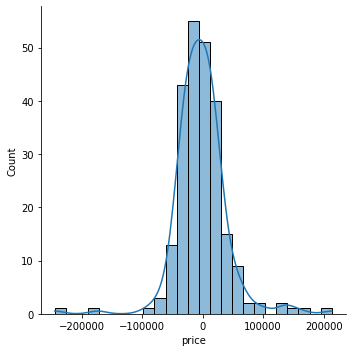

In [ ]:
sns.displot(test_residual, bins=25, kde=True); pass

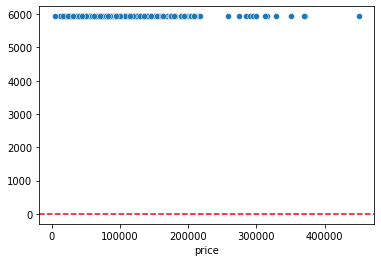

In [ ]:
sns.scatterplot(x=y_test[all], y=test_residual[0])

plt.axhline(y=0, color='r', ls='--'); pass

##Model coef influence

In [ ]:
len(X_train[all])

562

In [ ]:
import IPython

influence = []
for i, col in enumerate(X_train[all].columns):
  influence.append((round(reg.coef_[i], 3), 
                    col, 
                    'nonzero #<strong>'+str(np.count_nonzero(X_train[all][col]))+'</strong>', 
                    'diff val <strong>'+str(len(X_train[all][col].value_counts()))+'</strong>'
                    ))
#reg.coef_
IPython.display.HTML(html_table(influence))
#TODO: Atskiras įėjimas Butas palėpėje


1025.951,details__Plotas,nonzero #562,diff val 396
98.892,details__Metai,nonzero #562,diff val 99
0.699,median_price_seniunija,nonzero #562,diff val 24
12654.288,details__Kambarių sk.,nonzero #562,diff val 7
1951.037,details__Aukštas,nonzero #555,diff val 15
-1316.939,dist_from_cntr,nonzero #562,diff val 357
14908.033,details__Apsauga__Signalizacija,nonzero #85,diff val 2
27212.476,details__Apsauga__Vaizdo kameros,nonzero #50,diff val 2
20470.54,details__Papildomos patalpos__Terasa,nonzero #53,diff val 2
2754.69,details__Papildomos patalpos__Vieta automobiliui,nonzero #132,diff val 2
1212.721,details__Ypatybės__Aukštos lubos,nonzero #91,diff val 2


## Worst case analysis

In [ ]:
#X_test.head()
#y_test.index = y_test.index.map(str)
#y_pred_test.index = y_pred_test.index.map(str)
#print(type(y_test.index[0]))
#y_test

In [ ]:
print(bold('Test data'))
diff = []
for i, idx in enumerate(y_test[all].index):#range(len(y_test))
  idiff = round(abs(y_pred_test[0][i]) / y_test[all][i], 3)
  if idiff >= 3:
    diff.append((idiff, '<span style="color: green">'+str(y_test[all][i])+'</span>', round(y_pred_test[0][i]), idx))#, X_test[i].index
display(IPython.display.HTML(html_table(diff)))

Test data


7.416,27000.0,200237,1-3204425
7.4,15000.0,111007,1-3079927
3.984,12500.0,49801,1-3206319


In [ ]:
print(bold('Train data'))
#len(y_test), #y_pred_test #241
diff = []
for i, idx in enumerate(y_train[all].index):#range(len(y_test))
  idiff = round(abs(y_pred_train[0][i]) / y_train[all][i], 3)
  if idiff >= 3:
    diff.append((idiff, '<span style="color: green">'+str(y_train[all][i])+'</span>', round(y_pred_train[0][i]), idx))#, X_test[i].index
#diff

print(len(diff))
display(IPython.display.HTML(html_table(diff)))
#'</td><td>'.join(('1', '3'))
'''
4
2.902	29500	115099	1-3210302
2.103	15000	46542	1-3079927 !!!!
2.002	35000	105073	1-3208323
2.304	16000	52870	1-3209325

TODO: track how much change MAE and etc. 
'''
pass
metrics = dict(a_result_tbls[0]['tbl'].loc[0])
#del metrics['']
print('prev_metrics = ', end='')
metrics

Train data
4


5.231,9900.0,51785,1-3205595
4.632,11000.0,50956,1-3185522
3.339,29500.0,98505,1-3210302
4.255,22000.0,93617,1-3204137


prev_metrics = 

{'MAE te': 28436.71,
 'MAE tr': 29517.77,
 'MAPE te': 0.37,
 'MAPE tr': 0.3,
 'Model': 'lr=LR',
 'RMSE te': 42579.52,
 'RMSE tr': 47951.19,
 'R^2 te': 0.6459461849042465,
 'fit data': 'all',
 'len': 1124,
 'pred_te': 'all',
 'pred_tr': 'all',
 'wMAPE te': 0.27,
 'wMAPE tr': 0.25}

## Model evaluation. Measures/Metrics (MAE...)

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
print("LinearRegression")
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

#pd.set_option('display.float_format', lambda x: '%9.2f' % x)
#pd.options.display.float_format = '{:20.3f}'.format
for i in range(10):
  item = a_result_tbls[i]
  if item['model']:
    print(bold(item['model']))# + item['details'])
  i_DF = item['tbl'].copy()
  #i_DF[['MAE te', 'MAPE te', 'wMAPE te', 'RMSE te']] = 'background-color: yellow'
  #i_DF = df.style.apply(i_DF, axis = None)
  
  i_DF = i_DF.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['MAE te', 'MAPE te', 'wMAPE te', 'RMSE te']])
  p = '2'
  i_DF = i_DF.format({  'MAE tr':'{:9.'+p+'f}', 'MAE te':'{:9.'+p+'f}',
                               'MAPE tr':'{:9.2f}', 'MAPE te':'{:9.2f}',
                               'wMAPE tr':'{:9.2f}', 'wMAPE te':'{:9.2f}',
                               'RMSE tr':'{:9.2f}', 'RMSE te':'{:9.2f}',
                     	'R^2 te':'{:9.'+p+'f}'
                       })
                              #  'MSE tr':'{:9.2f}', 'MSE te':'{:9.2f}'})
  #i_DF = i_DF.format_index(precision=3) 
  #print(type(i_DF))

  #columns
  #display(i_DF)
  import IPython
  #/*.col_heading row0 */
  style = '''<style>
.data {
  width: 68px;
  #background-color: yellow;
}
td {text-align: right}
tr:hover {background-color: yellow;}
</style>'''
  style_hide_header = ''
  #if i != 0:
  #  style_hide_header = '''<style>#thead {display: none}</style>'''
#/*68px;*/
#  style_hide_header = '''<style>:not(thead:first-of-type) {display: none}</style>'''#thead {display: none}

  html = i_DF.to_html()
  if i != 0:
    html = html.replace('thead', 'thead hidden')
  display(IPython.display.HTML(html+style+style_hide_header))
  #display(IPython.display.HTML(i_DF.to_html()+style))
  #print(i_DF.to_html())

LinearRegression


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te
0,all,lr=LR,all,all,29517.77,28436.71,0.30,0.37,0.25,0.27,47951.19,42579.52,1124,0.65


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


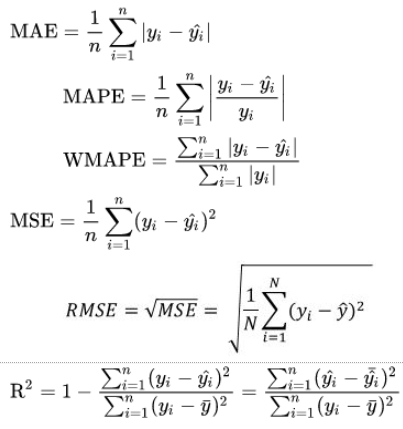

#Linear regression with cut outliers

In [ ]:
#df2.sort_values('details__Plotas', ascending=True, inplace=True)

# x2 = df2[df2.columns.difference([i for i in df2.columns if df2[i].dtype in ['string', 'object'] or i == 'price'])]
# #x2 = df2[['details__Plotas', 'phone1']]
# #df.loc[:, df.columns != 'price']#df[df.columns.difference(['price'])]
# #x2.phone1 = x2.phone1.apply(lambda x2: 0)

# #x.drop(['phone1', 'phone2'], axis=1, inplace=True)
# x2 = x2.fillna(0)

# y2 = df2['price']
# X_train2,X_test2,y_train2,y_test2=train_test_split(x2, y2, train_size = 0.7, random_state=42)

lr = LinearRegression()
i=1
fit,tr,te=no_outliers,no_outliers,no_outliers
reg = lr.fit(X_train[fit], y_train[fit])

y_pred_train[i] = reg.predict(X_train[tr])
y_pred_test[i] = reg.predict(X_test[te])

round_to = 2
mae_tr[i] = round(mae(y_train[tr], y_pred_train[i]), round_to)
mae_te[i] = round(mae(y_test[te], y_pred_test[i]), round_to)

mape_tr[i] = round(mape(y_train[tr], y_pred_train[i]), round_to)
mape_te[i] = round(mape(y_test[te], y_pred_test[i]), round_to)

wmape_tr[i] = round(wmape(y_train[tr], y_pred_train[i]), round_to)
wmape_te[i] = round(wmape(y_test[te], y_pred_test[i]), round_to)

rmse_tr[i] = round(rmse(y_train[tr], y_pred_train[i]), round_to)
rmse_te[i] = round(rmse(y_test[te], y_pred_test[i]), round_to)

Rsquared_te[i] = r2_score(y_test[te], y_pred_test[i])

a_result_tbls[0]['tbl'].loc[i] = [fit, 'LR', tr, te,#a_result_tbls[i]['details'],
      mae_tr[i], mae_te[i], mape_tr[i], mape_te[i], wmape_tr[i], wmape_te[i], rmse_tr[i], rmse_te[i], 
      len(y_train[tr])+len(y_train[te]), Rsquared_te[i]]

#RandomForest model_1 #4

In [ ]:
from sklearn.ensemble import RandomForestRegressor

i=4
fit,tr,te=all,all,all
rf = RandomForestRegressor(n_estimators=400, #The number of trees in the forest.
                            random_state=42).\
      fit(X_train[fit], y_train[fit])

y_pred_train[i] = rf.predict(X_train[tr])
y_pred_test[i] = rf.predict(X_test[te])

round_to = 2
mae_tr[i] = round(mae(y_train[tr], y_pred_train[i]), round_to)
mae_te[i] = round(mae(y_test[te], y_pred_test[i]), round_to)

mape_tr[i] = round(mape(y_train[tr], y_pred_train[i]), round_to)
mape_te[i] = round(mape(y_test[te], y_pred_test[i]), round_to)

wmape_tr[i] = round(wmape(y_train[tr], y_pred_train[i]), round_to)
wmape_te[i] = round(wmape(y_test[te], y_pred_test[i]), round_to)

rmse_tr[i] = round(rmse(y_train[tr], y_pred_train[i]), round_to)
rmse_te[i] = round(rmse(y_test[te], y_pred_test[i]), round_to)

Rsquared_te[i] = r2_score(y_test[te], y_pred_test[i])

a_result_tbls[0]['tbl'].loc[i] = [fit, 'rf=RF(n_e=400)', tr, te,#a_result_tbls[i]['details'],
      mae_tr[i], mae_te[i], mape_tr[i], mape_te[i], wmape_tr[i], wmape_te[i], rmse_tr[i], rmse_te[i], 
      len(y_train[tr])+len(y_train[te]), Rsquared_te[i]]

#a_result_tbls[i]['tbl']

In [ ]:
# import pickle

# # save the model to disk
# filename = 'rf_model_all.pickle'
# pickle.dump(rf, open(filename, 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test[fit], y_test[fit])
# print(result)

# RandomForest with cut outliers #5

In [ ]:
from sklearn.ensemble import RandomForestRegressor
i=5
fit,tr,te=no_outliers,no_outliers,no_outliers
rf2 = RandomForestRegressor(n_estimators=400, #The number of trees in the forest.
                            random_state=42).\
      fit(X_train[fit], y_train[fit])


y_pred_train[i] = rf2.predict(X_train[tr])
y_pred_test[i] = rf2.predict(X_test[te])

round_to = 2
mae_tr[i] = round(mae(y_train[tr], y_pred_train[i]), round_to)
mae_te[i] = round(mae(y_test[te], y_pred_test[i]), round_to)

mape_tr[i] = round(mape(y_train[tr], y_pred_train[i]), round_to)
mape_te[i] = round(mape(y_test[te], y_pred_test[i]), round_to)

wmape_tr[i] = round(wmape(y_train[tr], y_pred_train[i]), round_to)
wmape_te[i] = round(wmape(y_test[te], y_pred_test[i]), round_to)

rmse_tr[i] = round(rmse(y_train[tr], y_pred_train[i]), round_to)
rmse_te[i] = round(rmse(y_test[te], y_pred_test[i]), round_to)

Rsquared_te[i] = r2_score(y_test[te], y_pred_test[i])

a_result_tbls[0]['tbl'].loc[i] = [fit, 'rf2=RF(n_e=400)', tr, te,#a_result_tbls[i]['details'],
      mae_tr[i], mae_te[i], mape_tr[i], mape_te[i], wmape_tr[i], wmape_te[i], rmse_tr[i], rmse_te[i], 
      len(y_train[tr])+len(y_train[te]), Rsquared_te[i]]

#a_result_tbls[i]['tbl']

# RandomForest train:all(model_1) predict:cut outliers #6

In [ ]:
i=6
fit,tr,te=all,no_outliers,no_outliers

y_pred_train[i] = rf.predict(X_train[tr])
y_pred_test[i] = rf.predict(X_test[te])

round_to = 2
mae_tr[i] = round(mae(y_train[tr], y_pred_train[i]), round_to)
mae_te[i] = round(mae(y_test[te], y_pred_test[i]), round_to)

mape_tr[i] = round(mape(y_train[tr], y_pred_train[i]), round_to)
mape_te[i] = round(mape(y_test[te], y_pred_test[i]), round_to)

wmape_tr[i] = round(wmape(y_train[tr], y_pred_train[i]), round_to)
wmape_te[i] = round(wmape(y_test[te], y_pred_test[i]), round_to)

rmse_tr[i] = round(rmse(y_train[tr], y_pred_train[i]), round_to)
rmse_te[i] = round(rmse(y_test[te], y_pred_test[i]), round_to)

Rsquared_te[i] = r2_score(y_test[te], y_pred_test[i])

a_result_tbls[0]['tbl'].loc[i] = [fit, 'rf=RF(n_e=400)', tr, te,#a_result_tbls[i]['details'],
      mae_tr[i], mae_te[i], mape_tr[i], mape_te[i], wmape_tr[i], wmape_te[i], rmse_tr[i], rmse_te[i], 
      len(y_train[tr])+len(y_train[te]), Rsquared_te[i]]

## Model evaluation. Measures/Metrics (MAE...)

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
print("RandomForest")
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

#pd.set_option('display.float_format', lambda x: '%9.2f' % x)
#pd.options.display.float_format = '{:20.3f}'.format
for i in range(10):
  item = a_result_tbls[i]
  if item['model']:
    print(bold(item['model']))# + item['details'])
  i_DF = item['tbl'].copy()
  #i_DF[['MAE te', 'MAPE te', 'wMAPE te', 'RMSE te']] = 'background-color: yellow'
  #i_DF = df.style.apply(i_DF, axis = None)
  
  i_DF = i_DF.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['MAE te', 'MAPE te', 'wMAPE te', 'RMSE te']])
  p = '2'
  i_DF = i_DF.format({  'MAE tr':'{:9.'+p+'f}', 'MAE te':'{:9.'+p+'f}',
                               'MAPE tr':'{:9.2f}', 'MAPE te':'{:9.2f}',
                               'wMAPE tr':'{:9.2f}', 'wMAPE te':'{:9.2f}',
                               'RMSE tr':'{:9.2f}', 'RMSE te':'{:9.2f}',
                     	'R^2 te':'{:9.'+p+'f}'
                       })
                              #  'MSE tr':'{:9.2f}', 'MSE te':'{:9.2f}'})
  #i_DF = i_DF.format_index(precision=3) 
  #print(type(i_DF))

  #columns
  #display(i_DF)
  import IPython
  #/*.col_heading row0 */
  style = '''<style>
.data {
  width: 68px;
  #background-color: yellow;
}
td {text-align: right}
tr:hover {background-color: yellow;}
</style>'''
  style_hide_header = ''
  #if i != 0:
  #  style_hide_header = '''<style>#thead {display: none}</style>'''
#/*68px;*/
#  style_hide_header = '''<style>:not(thead:first-of-type) {display: none}</style>'''#thead {display: none}

  html = i_DF.to_html()
  if i != 0:
    html = html.replace('thead', 'thead hidden')
  display(IPython.display.HTML(html+style+style_hide_header))
  #display(IPython.display.HTML(i_DF.to_html()+style))
  #print(i_DF.to_html())

RandomForest


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te
0,all,lr=LR,all,all,29517.77,28436.71,0.30,0.37,0.25,0.27,47951.19,42579.52,1124,0.65
1,noOutlrs,LR,noOutlrs,noOutlrs,27365.09,27168.21,0.29,0.34,0.24,0.25,43666.69,39197.06,1114,0.70
4,all,rf=RF(n_e=400),all,all,9445.65,21685.79,0.10,0.25,0.08,0.20,16904.30,32510.26,1124,0.79
5,noOutlrs,rf2=RF(n_e=400),noOutlrs,noOutlrs,9258.70,21586.54,0.09,0.25,0.08,0.20,16428.48,33510.47,1114,0.78
6,all,rf=RF(n_e=400),noOutlrs,noOutlrs,9256.36,21249.92,0.10,0.24,0.08,0.20,16584.49,31401.48,1114,0.81


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


In [ ]:
#test = pd.read_csv('aruodas_metrics.csv', index_col=0)
#test

## Worst case analysis

In [ ]:
print(bold('Test data'))
diff = []
for i, idx in enumerate(y_test[no_outliers].index):#range(len(y_test))
  idiff = round(abs(y_pred_test[0][i]) / y_test[all][i], 3)
  if idiff >= 3:
    diff.append((idiff, '<span style="color: green">'+str(y_test[all][i])+'</span>', round(y_pred_test[0][i]), idx))#, X_test[i].index
display(IPython.display.HTML(html_table(diff)))

Test data


7.416,27000.0,200237,1-3011939
7.4,15000.0,111007,1-3190192
3.984,12500.0,49801,1-3211158


In [ ]:
print(bold('Train data'))
#len(y_test), #y_pred_test #241
diff = []
for i, idx in enumerate(y_train[no_outliers].index):#range(len(y_test))
  idiff = round(abs(y_pred_train[6][i]) / y_train[no_outliers][i], 3)
  if idiff >= 3:
    diff.append((idiff, '<span style="color: green">'+str(y_train[all][i])+'</span>', round(y_pred_train[6][i]), idx))#, X_test[i].index
#diff

print(len(diff))
display(IPython.display.HTML(html_table(diff)))
#'</td><td>'.join(('1', '3'))
'''
4
2.902	29500	115099	1-3210302
2.103	15000	46542	1-3079927 !!!!
2.002	35000	105073	1-3208323
2.304	16000	52870	1-3209325

TODO: track how much change MAE and etc. 
'''

'''
metrics = dict(a_result_tbls[0]['tbl'].loc[0])
del metrics['']
print('prev_metrics = ', end='')
metrics
'''
pass

Train data
1


3.959,79000.0,12471,1-3165940


##Feature importance

In [ ]:
rf.feature_names_in_

array(['details__Plotas', 'details__Metai', 'median_price_seniunija',
       'details__Kambarių sk.', 'details__Aukštas', 'dist_from_cntr',
       'details__Apsauga__Signalizacija',
       'details__Apsauga__Vaizdo kameros',
       'details__Papildomos patalpos__Terasa',
       'details__Papildomos patalpos__Vieta automobiliui',
       'details__Ypatybės__Aukštos lubos',
       'details__Ypatybės__Butas per kelis aukštus',
       'details__Ypatybės__Uždaras kiemas',
       'details__Ypatybės__Virtuvė sujungta su kambariu'], dtype=object)

In [ ]:
#rf.get
#import sklearn
#sklearn.__version__ #1.0.2

'\nhttps://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html\nhttps://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html\nhttps://mljar.com/blog/feature-importance-in-random-forest/\n\nhttps://github.com/scikit-learn/scikit-learn/commits/main/examples/inspection/plot_permutation_importance.py\n'

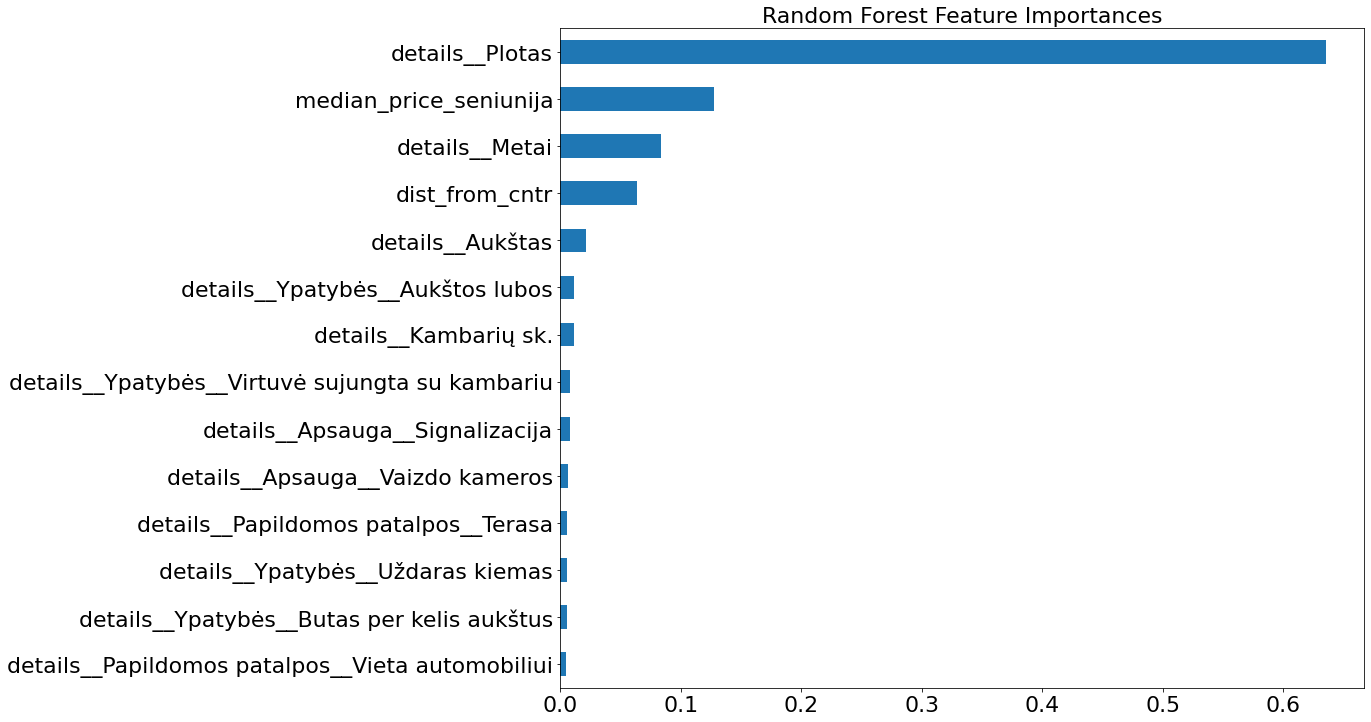

In [ ]:
#feature_names = rf.get_feature_names_out()#[:-1]
feature_names = rf.feature_names_in_

mdi_importances = pd.Series(
    rf.feature_importances_, index=feature_names#[-1]
).sort_values(ascending=True)
ax = mdi_importances.plot.barh(figsize=(15,10))
ax.set_title("Random Forest Feature Importances", size=22)#(MDI - Mean Decrease in Impurity)
ax.figure.tight_layout()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
'''
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html
https://mljar.com/blog/feature-importance-in-random-forest/

https://github.com/scikit-learn/scikit-learn/commits/main/examples/inspection/plot_permutation_importance.py
'''
#ax
#ax.set_figheight(150)
#ax.set_figwidth(15)

#XGBoost #7

In [ ]:
fit,tr,te=all,all,all

In [ ]:
import xgboost
from xgboost import XGBRegressor
'''
n_estimators specifies how many times to go through the modeling cycle described above.
It is equal to the number of models that we include in the ensemble.
  Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
  Too high a value causes overfitting, which causes accurate predictions on training data, 
    but inaccurate predictions on test data (which is what we care about).
  Typical values range from 100-1000, though this depends a lot on the learning_rate parameter discussed below.
'''
#my_model = XGBRegressor(n_estimators=500)#objective='reg:squarederror')
#my_model.fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.04, objective='reg:squarederror')
xgb.fit(X_train[fit], y_train[fit], early_stopping_rounds=100, 
             eval_set=[(X_test[fit], y_test[fit])],
             verbose=True)
#Default my_model.n_estimators = 100
#MAE: Mean Absolute Error: 7933.832963239108

#n_estimators = 500 #1 sek.
#MAE: Mean Absolute Error: 7006.356826212396

#my_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=True)
#MAE: Mean Absolute Error: 7261.903008298756 RMSE 21170.2

#DEFAULT learning_rate=0.1

#XGBRegressor(learning_rate=0.05, n_estimators=500, objective='reg:squarederror')
#rmse:20859.2 MAE: Mean Absolute Error: 6969.086448067946

[0]	validation_0-rmse:123359
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:118782
[2]	validation_0-rmse:114636
[3]	validation_0-rmse:110447
[4]	validation_0-rmse:106600
[5]	validation_0-rmse:102927
[6]	validation_0-rmse:99477.8
[7]	validation_0-rmse:95941.1
[8]	validation_0-rmse:92767.5
[9]	validation_0-rmse:89773.3
[10]	validation_0-rmse:86835.2
[11]	validation_0-rmse:84095.3
[12]	validation_0-rmse:81589.6
[13]	validation_0-rmse:79144
[14]	validation_0-rmse:76785.6
[15]	validation_0-rmse:74439.2
[16]	validation_0-rmse:72184.8
[17]	validation_0-rmse:69946.4
[18]	validation_0-rmse:67979.7
[19]	validation_0-rmse:66118.5
[20]	validation_0-rmse:64317.3
[21]	validation_0-rmse:62548.1
[22]	validation_0-rmse:60891.7
[23]	validation_0-rmse:59297.9
[24]	validation_0-rmse:57832
[25]	validation_0-rmse:56378.9
[26]	validation_0-rmse:55056.2
[27]	validation_0-rmse:53778.2
[28]	validation_0-rmse:52582
[29]	validation_0-rmse:51469.9
[30]	validation_0-rmse:503

XGBRegressor(learning_rate=0.04, n_estimators=1000,
             objective='reg:squarederror')

##Save the model to disk

In [ ]:
#import xgboost
xgboost.__version__#0.90
int(0.9)

0

In [ ]:
'''
import pickle

# save the model to disk
filename = 'xgboost_model_all.pickle'
xgb.save_model('xgboost_model_all.txt')
#pickle.dump(xgb, open(filename, 'wb'))

# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test[fit], y_test[fit])
# print(result)

#bst = xgb.Booster({'nthread': 4})  # init model
#bst.load_model('xgboost_model_all.json')  # load data

xgb_model_latest = XGBRegressor(n_estimators=1000, learning_rate=0.04, objective='reg:squarederror') #xgboost. # or which ever sklearn booster you're are using
xgb_model_latest.load_model("xgboost_model_all.json")

result = xgb_model_latest.score(X_test[fit], y_test[fit])
print(result)
'''

'\nimport pickle\n\n# save the model to disk\nfilename = \'xgboost_model_all.pickle\'\nxgb.save_model(\'xgboost_model_all.txt\')\n#pickle.dump(xgb, open(filename, \'wb\'))\n\n# load the model from disk\n# loaded_model = pickle.load(open(filename, \'rb\'))\n# result = loaded_model.score(X_test[fit], y_test[fit])\n# print(result)\n\n#bst = xgb.Booster({\'nthread\': 4})  # init model\n#bst.load_model(\'xgboost_model_all.json\')  # load data\n\nxgb_model_latest = XGBRegressor(n_estimators=1000, learning_rate=0.04, objective=\'reg:squarederror\') #xgboost. # or which ever sklearn booster you\'re are using\nxgb_model_latest.load_model("xgboost_model_all.json")\n\nresult = xgb_model_latest.score(X_test[fit], y_test[fit])\nprint(result)\n'

In [ ]:
i=7


y_pred_train[i] = xgb.predict(X_train[tr])
y_pred_test[i] = xgb.predict(X_test[te])

round_to = 2
mae_tr[i] = round(mae(y_train[tr], y_pred_train[i]), round_to)
mae_te[i] = round(mae(y_test[te], y_pred_test[i]), round_to)

mape_tr[i] = round(mape(y_train[tr], y_pred_train[i]), round_to)
mape_te[i] = round(mape(y_test[te], y_pred_test[i]), round_to)

wmape_tr[i] = round(wmape(y_train[tr], y_pred_train[i]), round_to)
wmape_te[i] = round(wmape(y_test[te], y_pred_test[i]), round_to)

rmse_tr[i] = round(rmse(y_train[tr], y_pred_train[i]), round_to)
rmse_te[i] = round(rmse(y_test[te], y_pred_test[i]), round_to)

Rsquared_te[i] = r2_score(y_test[te], y_pred_test[i])

a_result_tbls[0]['tbl'].loc[i] = [fit, 'XGBoost(n_e=1000, l_r=0.04).fit( early_stopping_rounds=100)',
                                  tr, te,#a_result_tbls[i]['details'],
      mae_tr[i], mae_te[i], mape_tr[i], mape_te[i], wmape_tr[i], wmape_te[i], rmse_tr[i], rmse_te[i], 
      len(y_train[tr])+len(y_train[te]), Rsquared_te[i]]

##GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

score = "r2"
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

tuned_parameters = {
    # 'max_depth': range (2, 10, 1),
    'n_estimators': [1500, 1000, 1200, 1800, 2000],#range(500, 2000, 100),
    'learning_rate': [0.01, 0.04, 0.06, 0.08, 0.1]
}

clf_grid = GridSearchCV(model_xgb, tuned_parameters, scoring=score)
clf_grid.fit(X_train[fit], y_train[fit])

y_pred_test[i] = clf_grid.predict(X_test[te])

Rsquared_te_xgb = r2_score(y_test[te], y_pred_test[i])
print(f'Grid Search R2: {Rsquared_te_xgb}')

print("Best parameters set found on training set:")
print(clf_grid.best_params_)

Grid Search R2: 0.7422595281689248
Best parameters set found on training set:
{'learning_rate': 0.01, 'n_estimators': 1200}


#XGBoost no outliers #8

In [ ]:
fit, tr, te = no_outliers, no_outliers, no_outliers

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.04, objective='reg:squarederror')
xgb.fit(X_train[fit], y_train[fit], early_stopping_rounds=100, 
             eval_set=[(X_test[fit], y_test[fit])],
             verbose=True)

i=8

y_pred_train[i] = xgb.predict(X_train[tr])
y_pred_test[i] = xgb.predict(X_test[te])

round_to = 2
mae_tr[i] = round(mae(y_train[tr], y_pred_train[i]), round_to)
mae_te[i] = round(mae(y_test[te], y_pred_test[i]), round_to)

mape_tr[i] = round(mape(y_train[tr], y_pred_train[i]), round_to)
mape_te[i] = round(mape(y_test[te], y_pred_test[i]), round_to)

wmape_tr[i] = round(wmape(y_train[tr], y_pred_train[i]), round_to)
wmape_te[i] = round(wmape(y_test[te], y_pred_test[i]), round_to)

rmse_tr[i] = round(rmse(y_train[tr], y_pred_train[i]), round_to)
rmse_te[i] = round(rmse(y_test[te], y_pred_test[i]), round_to)

Rsquared_te[i] = r2_score(y_test[te], y_pred_test[i])

a_result_tbls[0]['tbl'].loc[i] = [fit, 'XGBoost(n_e=1000, l_r=0.04).fit( early_stopping_rounds=100)',
                                  tr, te,#a_result_tbls[i]['details'],
      mae_tr[i], mae_te[i], mape_tr[i], mape_te[i], wmape_tr[i], wmape_te[i], rmse_tr[i], rmse_te[i], 
      len(y_train[tr])+len(y_train[te]), Rsquared_te[i]]

[0]	validation_0-rmse:123877
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:119582
[2]	validation_0-rmse:115420
[3]	validation_0-rmse:111242
[4]	validation_0-rmse:107421
[5]	validation_0-rmse:103599
[6]	validation_0-rmse:100099
[7]	validation_0-rmse:96819
[8]	validation_0-rmse:93442.5
[9]	validation_0-rmse:90209.1
[10]	validation_0-rmse:87298.1
[11]	validation_0-rmse:84585.7
[12]	validation_0-rmse:81781.9
[13]	validation_0-rmse:79262.2
[14]	validation_0-rmse:76871.3
[15]	validation_0-rmse:74487.6
[16]	validation_0-rmse:72264.1
[17]	validation_0-rmse:70295.8
[18]	validation_0-rmse:68356.4
[19]	validation_0-rmse:66394
[20]	validation_0-rmse:64624.6
[21]	validation_0-rmse:62841.3
[22]	validation_0-rmse:61217.3
[23]	validation_0-rmse:59661.2
[24]	validation_0-rmse:58155.8
[25]	validation_0-rmse:56730.6
[26]	validation_0-rmse:55350.5
[27]	validation_0-rmse:54099.7
[28]	validation_0-rmse:52954.5
[29]	validation_0-rmse:51834.7
[30]	validation_0-rmse:50

## Model evaluation. Measures/Metrics (MAE...)

In [ ]:
print("XGBoost")
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

#pd.set_option('display.float_format', lambda x: '%9.2f' % x)
#pd.options.display.float_format = '{:20.3f}'.format
for i in range(10):
  item = a_result_tbls[i]
  if item['model']:
    print(bold(item['model']))# + item['details'])
  i_DF = item['tbl'].copy()
  #i_DF[['MAE te', 'MAPE te', 'wMAPE te', 'RMSE te']] = 'background-color: yellow'
  #i_DF = df.style.apply(i_DF, axis = None)
  
  i_DF = i_DF.style.applymap(highlight_cols, subset=pd.IndexSlice[:, 
            ['MAE te', 'MAPE te', 'wMAPE te', 'RMSE te', 'R^2 te']])
  p = '2'
  i_DF = i_DF.format({  'MAE tr':'{:9.'+p+'f}', 'MAE te':'{:9.'+p+'f}',
                               'MAPE tr':'{:9.2f}', 'MAPE te':'{:9.2f}',
                               'wMAPE tr':'{:9.2f}', 'wMAPE te':'{:9.2f}',
                               'RMSE tr':'{:9.2f}', 'RMSE te':'{:9.2f}',
                     	'R^2 te':'{:9.'+p+'f}'
                       })
                              #  'MSE tr':'{:9.2f}', 'MSE te':'{:9.2f}'})
  #i_DF = i_DF.format_index(precision=3) 
  #print(type(i_DF))

  #display(i_DF)
  import IPython
  #/*.col_heading row0 */
  style = '''<style>
.data {
  width: 68px;
  #background-color: yellow;
}
td {text-align: right}
tr:hover {background-color: yellow;}
</style>'''
  style_hide_header = ''
  #if i != 0:
  #  style_hide_header = '''<style>#thead {display: none}</style>'''
#/*68px;*/
#  style_hide_header = '''<style>:not(thead:first-of-type) {display: none}</style>'''#thead {display: none}

  html = i_DF.to_html()
  if i != 0:
    html = html.replace('thead', 'thead hidden')
  display(IPython.display.HTML(html+style+style_hide_header))
  #display(IPython.display.HTML(i_DF.to_html()+style))
  #print(i_DF.to_html())

XGBoost


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te
0,all,lr=LR,all,all,29517.77,28436.71,0.30,0.37,0.25,0.27,47951.19,42579.52,1124,0.65
1,noOutlrs,LR,noOutlrs,noOutlrs,27365.09,27168.21,0.29,0.34,0.24,0.25,43666.69,39197.06,1114,0.70
4,all,rf=RF(n_e=400),all,all,9445.65,21685.79,0.10,0.25,0.08,0.20,16904.30,32510.26,1124,0.79
5,noOutlrs,rf2=RF(n_e=400),noOutlrs,noOutlrs,9258.70,21586.54,0.09,0.25,0.08,0.20,16428.48,33510.47,1114,0.78
6,all,rf=RF(n_e=400),noOutlrs,noOutlrs,9256.36,21249.92,0.10,0.24,0.08,0.20,16584.49,31401.48,1114,0.81
7,all,"XGBoost(n_e=1000, l_r=0.04).fit( early_stopping_rounds=100)",all,all,13442.82,21202.66,0.15,0.25,0.12,0.20,19406.15,32181.63,1124,0.80
8,noOutlrs,"XGBoost(n_e=1000, l_r=0.04).fit( early_stopping_rounds=100)",noOutlrs,noOutlrs,18161.69,23355.20,0.21,0.27,0.16,0.22,28991.68,35465.85,1114,0.75


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


,fit data,Model,pred_tr,pred_te,MAE tr,MAE te,MAPE tr,MAPE te,wMAPE tr,wMAPE te,RMSE tr,RMSE te,len,R^2 te


In [ ]:
X_test[all].head(1)
xgb.n_jobs

1

In [ ]:
from sklearn.metrics import mean_absolute_error
#names = xgb.get_booster().feature_names #['f0', 'f1', 'f2', 'f3', ..., 'f54']
#print(names)
predictions = xgb.predict(X_test[all])
print("MAE (Mean Absolute Error): " + str(mean_absolute_error(predictions, y_test[all])))

MAE (Mean Absolute Error): 24085.393469592844


#Save model evaluation results

In [ ]:
#a_result_tbls[0]['tbl'].to_csv('aruodas_metrics_without.csv')

#Plotas
#test = pd.read_csv('aruodas_metrics.csv', index_col=0)
#display(a_result_tbls[0]['tbl'])
#test

# Correlation plot

In [ ]:
def corr_plot(mat, title='My Title', ax=None, color='cividis'):
  if ax == None:
    ax = plt.subplots(figsize=(7, 40))[1]
  #plt.subplots(figsize=(7, 40))#22 sek.
  #plt.subplots(figsize=(20, 20))#14 sek.#per mažas, netelpa skaičiai.
  #plt.subplots(figsize=(200, 200))#30 sek.
  ax.set_title(title, fontsize=16)
  print(type(sns.heatmap(mat, linewidths=0.2, square=True, cmap=color, #
              linecolor='w', annot=True, annot_kws={'size':9}, cbar_kws={'shrink': .5}, 
              vmin=-0.22, vmax=1,#vmax=0.7,
              ax=ax)))
  #matplotlib.axes._subplots.AxesSubplot

In [ ]:
features = [i for i in df.columns if df[i].dtype not in ['string', 'object']]# and i != 'price'
corr_matrix = df[features].fillna(0).corr().round(2)

In [ ]:
#len(features)
corr_matrix[['price','price_per_m2']].head(2)
corr_matrix[['price','price_per_m2']].shape

(86, 2)

In [ ]:
#sorted([i for i in df.columns if 'details__' in i])

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


-0.26

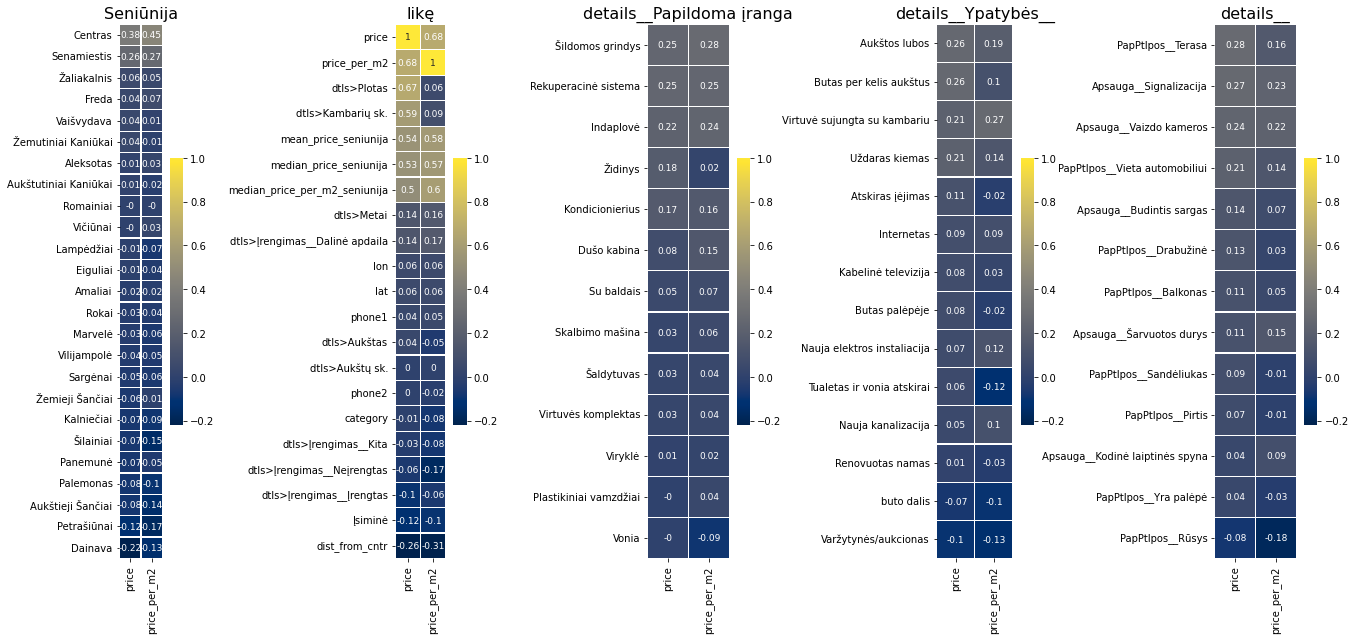

In [ ]:
cols = ["Seniūnija", 
        "likę", 
        "details__Papildoma įranga", 
        "details__Ypatybės__", 
        "details__",#Papildomos patalpos__, Apsauga__
        ]
f, axes = plt.subplots(nrows=1, ncols=len(cols),figsize=(18.5, 9))
#(ax1,ax2, ax3, ax4, ax5)

c_cols = ['price','price_per_m2']
cor = {}
cor[0] = corr_matrix.loc[[f for f in corr_matrix.index if f.startswith('seniunija')], c_cols]
cor[0].index = [i.replace('seniunija__', '') for i in cor[0].index]
cor[0].sort_values(by='price', ascending=False, inplace=True)

cor[1] = corr_matrix.loc[[f for f in corr_matrix.index 
                          if not f.startswith('seniunija') 
                          and not f.startswith('details__Papildoma įranga__')
                          and not f.startswith('details__Ypatybės__')
                          and not f.startswith('details__Papildomos patalpos__')
                          and not f.startswith('details__Apsauga__')], c_cols]\
                          #.sort_index()
cor[1].sort_values(by='price', ascending=False, inplace=True)
cor[1].index = [i.replace('details__', 'dtls>') for i in cor[1].index]

cor[2] = corr_matrix.loc[[f for f in corr_matrix.index if f.startswith('details__Papildoma įranga__')], c_cols]
cor[2].index = [i.replace('details__Papildoma įranga__', '') for i in cor[2].index]
cor[2].sort_values(by='price', ascending=False, inplace=True)

cor[3] = corr_matrix.loc[[f for f in corr_matrix.index if f.startswith('details__Ypatybės__')], c_cols]
cor[3].index = [i.replace('details__Ypatybės__', '') for i in cor[3].index]
cor[3].sort_values(by='price', ascending=False, inplace=True)

cor[4] = corr_matrix.loc[[f for f in corr_matrix.index 
                          if f.startswith('details__Papildomos patalpos__')
                          or f.startswith('details__Apsauga__')], c_cols]\
                          #.sort_index()
cor[4].sort_values(by='price', ascending=False, inplace=True)
cor[4].index = [i.replace('details__', '').replace('Papildomos patalpos__', 'PapPtlpos__') for i in cor[4].index]
#cor[5] = corr_matrix.loc[[f for f in corr_matrix.index if f.startswith('details__Apsauga__')], c_cols]
#cor[5].index = [i.replace('details__Apsauga__', '') for i in cor[4].index]

'''
width_max = 2
height_max = max(s.shape[1] for s in [first, second, third])
row = 1
col = 2
from matplotlib.figure import figaspect
w, h = figaspect(row*width_max/(col*height_max))
f.set_size_inches(w*2, h*2)
'''#Correlation matrix
for i in range(len(cols)):
  corr_plot(cor[i], cols[i], axes[i])
plt.tight_layout()
#ax1.get_autoscale_on()#False
#ax1.set_figure(fig)
#sns.heatmap(corr_matrix);

#print(min(corr_matrix.loc[:, 'price']))
#plt.clim(min(corr_matrix.loc[:, 'price']), 1) 
vmin, vmax = min(corr_matrix.loc[:, 'price']), 1
vmin
#for ax in axes:
#  ax.set_clim(vmin, vmax)

#Minimaze dataframe types size

In [ ]:
'''
dataframe minimize data types
dataframe optimize data types

https://towardsdatascience.com/how-to-reduce-the-size-of-a-pandas-dataframe-in-python-7ed6e4269f88
https://vincentteyssier.medium.com/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e
https://www.kaggle.com/code/arjanso/reducing-dataframe-memory-size-by-65/notebook
'''
pass

#OLS, confidence intervals

In [ ]:
import statsmodels.api as sm

spector_data = sm.datasets.spector.load(as_pandas=True)

#type(spector_data.exog)#numpy.ndarray //pandas.core.frame.DataFrame
#spector_data.exog
#GPA	TUCE	PSI #32
#type(spector_data.endog) #Grade #32  pandas.core.series.Series -> float


X_train_c = sm.add_constant(X_train[all])

model = sm.OLS(y_train[all], X_train_c)
results = model.fit()
print(results)
print(results.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     78.49
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          8.12e-121
Time:                        08:01:41   Log-Likelihood:                -6854.6
No. Observations:                 562   AIC:                         1.374e+04
Df Residuals:                     547   BIC:                         1.380e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


sm_X.shape (50, 4)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     435.5
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           9.14e-34
Time:                        08:01:41   Log-Likelihood:                -41.011
No. Observations:                  50   AIC:                             90.02
Df Residuals:                      46   BIC:                             97.67
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4828      0.030 

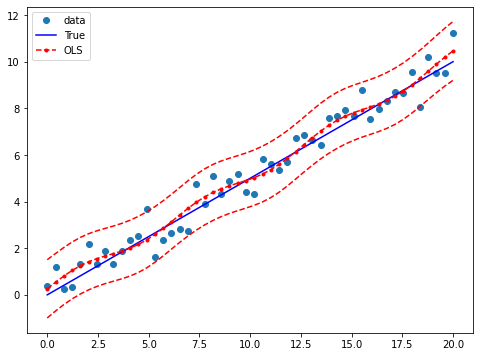

In [ ]:
'''
nsample = 100
sm_x = np.linspace(0, 10, 100)
sm_X = np.column_stack((sm_x, sm_x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

sm_X = sm.add_constant(sm_X)
sm_y = np.dot(sm_X, beta) + e

model = sm.OLS(sm_y, sm_X)
results = model.fit()
print(results.summary())
print("Parameters: ", results.params)
print("R2: ", results.rsquared)
'''
#----------------------------
nsample = 50
sig = 0.5
sm_x = np.linspace(0, 20, nsample)
sm_X = np.column_stack((sm_x, np.sin(sm_x), (sm_x - 5) ** 2, np.ones(nsample)))
print('sm_X.shape', sm_X.shape)#sm_X.shape (50, 4)


#beta = [0.5, 0.5, -0.02, 5.0]
beta = [0.5, 0, 0, 0]

sm_y_true = np.dot(sm_X, beta)
sm_y = sm_y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(sm_y, sm_X).fit()
print(res.summary())

print("Parameters: ", res.params)
print("R2: ", results.rsquared)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(sm_x, sm_y, "o", label="data")
ax.plot(sm_x, sm_y_true, "b-", label="True")
ax.plot(sm_x, res.fittedvalues, "r--.", label="OLS")
ax.plot(sm_x, iv_u, "r--")
ax.plot(sm_x, iv_l, "r--")
ax.legend(loc="best")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     78.49
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          8.12e-121
Time:                        08:01:41   Log-Likelihood:                -6854.6
No. Observations:                 562   AIC:                         1.374e+04
Df Residuals:                     547   BIC:                         1.380e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

(562,)

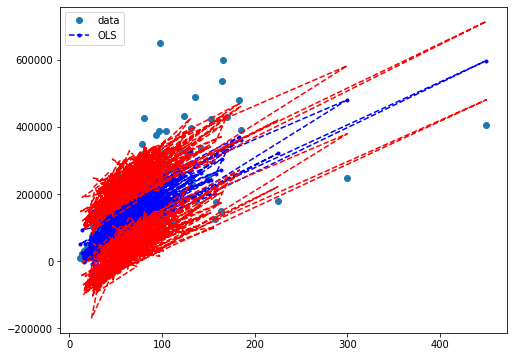

In [ ]:
res = sm.OLS(y_train[all], X_train_c).fit()
print(res.summary())

print("Parameters: ", res.params)
print("R2: ", results.rsquared)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
sm_x = X_train[all]['details__Plotas']
#ax.plot(sm_x, sm_y, "o", label="data")
ax.plot(sm_x, y_train[all], "o", label="data")
#ax.plot(sm_x, y_train, "b-", label="True")#sm_y_true
ax.plot(sm_x, res.fittedvalues, "b--.", label="OLS")
ax.plot(sm_x, iv_u, "r--")
ax.plot(sm_x, iv_l, "r--")
ax.legend(loc="best")
(res.fittedvalues.shape)#(562,) pandas.core.series.Series